## **`Data Daegu Apartment (Apartment Price Prediction)`** 

### **Content**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

## **`0. Initial Setup`**

In [164]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from scipy.stats import normaltest
import phik
from phik.report import plot_correlation_matrix
from phik import report
from IPython.display import display
from scipy.stats import shapiro

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Model Selection

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import time

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import missingno as msno

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## **`1. Business Problem Understanding`**

#### **Context**
Daegu adalah sebuah kota besar di Korea Selatan. Terletak di bagian tenggara negara tersebut dan merupakan kota terbesar keempat di Korea Selatan setelah Seoul, Busan, dan Incheon. Daegu memiliki populasi yang besar dan merupakan pusat ekonomi, budaya, metropolitan dan pendidikan di wilayah tersebut. Daegu juga memiliki banyak tempat wisata yang menarik, termasuk kuil-kuil bersejarah, museum, taman-taman yang indah, dan pasar tradisional yang bisa dikunjungi. Selain itu, penduduknya dikenal ramah dan budaya kotanya menarik bagi para turis dan pelancong dari dalam dan luar negeri. Hal tersebut membuat pertumbuhan penduduk dan ekonomi meningkat dengan pesat. Menurut [**worldpopulationreview.com**](https://worldpopulationreview.com/world-cities/daegu-population) populasi Daegu pada tahun 2023 diperkirakan mencapai 2.180.997 jiwa. Akibat padatnya jumlah penduduk namun dengan lahan tempat tinggal yang terbatas membuat Daegu selayaknya kota metropolitan yang lain, mengandalkan apartment sebagai pilihan untuk tempat tinggal. Menurut survey pada tahun 2021, jumlah total gedung apartemen di Daegu, Korea Selatan mencapai jumlah kurang lebih 240 ribu. Pada tahun 2023 sejumlah 36000 keluarga memutuskan untuk mencari dan tinggal di apartment daerah Daegu, ini merupakan jumlah terbesar yang pernah ada. Karena perkembangan Daegu yang pesat, maka permintaan akan sewa apartemen pun meningkat.

* [**Sumber 1 : Daegu**](https://id.wikipedia.org/wiki/Daegu)
* [**Sumber 2 : Daegu Population 2023**](https://worldpopulationreview.com/world-cities/daegu-population)
* [**Sumber 3 : More than 36,000 Apartments in Daegu by 2023**](https://www.archyde.com/more-than-36000-apartments-in-daegu-by-2023-the-highest-ever-article/)
* [**Sumber 4 : Number of Apartment Buildings in Daegu**](https://www.statista.com/statistics/1303257/south-korea-apartments-in-daegu-by-number-of-stories/#statisticContainer)
* [**Sumber 5 : Property Prices in Daegu, South Korea**](https://www.numbeo.com/property-investment/in/Daegu)

#### **Problem Statement**

Permintaan yang tinggi terhadap sewa apartment di kota Daegu menjadi tantangan bagi sebuah agen properti agar dapat bersaing dengan agen properti lainnya. Agar tetap dapat memperoleh customer yang loyal menjadi pelanggan dalam menyewa apartment, agen properti harus jeli dalam menentukan harga sewa yang sesuai dengan fasilitas dan fitur yang ditawarkan oleh sebuah unit apartment. Oleh karena itu dibutuhkan sebuah model yang dapat menjadi solusi untuk permasalahan tersebut, agar sebuah agen properti dapat menentukan harga sewa yang lebih kompetitif dan memudahkan untuk mencapai sales goal dan target.  

#### **Goal**
Berdasarkan permasalahan tersebut, perlu dibangun sebuah model yang dapat memprediksi harga sewa apartemen berdasarkan data yang disediakan, yaitu model yang layak dengan tingkat pembelajaran model terbaik dengan tingkat kesalahan seminimal mungkin. Sehingga sebuah agen properti dapat menentukan harga yang sesuai untuk menyewakan apartemen mereka. Selain itu jika dilihat dari sisi pembeli apartemen mendapatkan harga sewa yang lebih kompetitif sehingga *customer satisfaction* akan semakin meningkat.

#### **Project Stakeholder**
Pada project ini pembuatan model prediksi ditujukan kepada stakeholder agen properti. Dimana tugas agen properti adalah membantu klien dalam proses penyewaan, pembelian atau penjualan properti, dalam hal ini adalah properti jenis apartment. Riset terhadap detail data apartment yang akan menjadi acuan untuk sewa apartment, seperti mencari apartment yang sesuai dengan kriteria klien berdasarkan faktor-faktor seperti lokasi, ukuran, fasilitas, kondisi, dan harga pasar penting untuk dilakukan agar customer mendapatkan harga terbaik dalam melakukan sewa apartment.

#### **Analytics Approach**

Selanjutnya, untuk dapat menentukan harga sewa apartment yang tepat di kota Daegu. Kita akan melakukan analisa data untuk dapat menemukan pola dari fitur-fitur yang ada. Kita akan menggunakan fitur-fitur (semua informasi lain kecuali harga jual) pada data yang disediakan untuk memprediksi harga sewa setiap apartemen dengan menggunakan algoritma machine learning. Lalu, membangun sebuah model regresi yang akan membantu agen properti dalam menentukan harga sewa unit apartment.

#### **Problem Limitation**

* Pada project Machine Learning kali ini merupakan project pertama, dimana menggunakan laptop sebagai media pemrosesan dan penyimpanan lokal, sehingga dengan perangkat memiliki kapasitas terbatas tersebut, maka harus berhati-hati dalam memilih model.
* Oleh karena itu model dengan tipe standalone akan diprioritaskan untuk dilakukan tuning dan optimisasi terlebih dahulu.

#### **Mectric Evaluation**

Terdapat 4 metrics umum yang digunakan untuk regresi yaitu MAE, RMSE, MAPE, dan MSE. Namun pada *case* ini *Metric Evaluation* yang akan digunakan untuk model regresi antara lain RMSE, MAR dan MAPE. Untuk MSE tidak digunakan karena lebih sulit untuk diintepreasikan dan dapat diwakili oleh RMSE,
* RMSE adalah nilai rataan akar kuadrat dari error

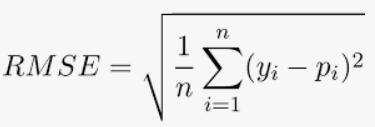

* MAE adalah rataan nilai absolut dari error

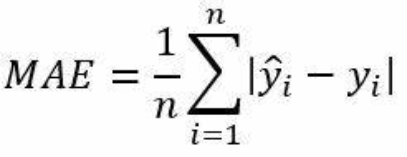

* MAPE adalah rataan persentase error yang dihasilkan oleh model regresi

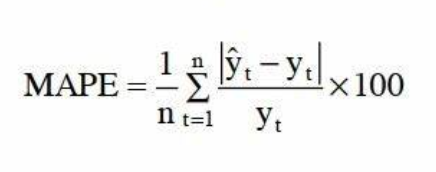

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, maka model semakin akurat dalam memprediksi harga sewa apartment sesuai dengan limitasi fitur yang digunakan.

Selain itu, kita menggunakan *metric evaluation* R-Squared dan Adjusted R-Squared jika model terbaik yang dipilih pada project ini merupakan linear model. R-squared disebut juga sebagai koefisien determinasi yang menjelaskan seberapa jauh data dependen dapat dijelaskan oleh data independen. R-squared bernilai antar 0 – 1 dengan ketentuan semakin mendekati angka satu berarti semakin baik. R-squared hanya berlaku untuk model-model yang linier.

## **`2. Data Understanding`**

#### **Atributes Informations**

Dataset analisis **"data_daegu_apartment"** berisi informasi deskripsi tentang detail fitur dan fasilitas apartemen yang terletak di Daegu, Korea Selatan. Dataset ini berisi 11 kolom yang merinci faktor-faktor yang mempengaruhi harga sewa apartemen, berikut ini adalah detailnya:

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| `Hallway Type` | Text | Tipe Apartment |
| `TimeToSubway` | Text | Waktu yang dibutuhkan ke stasiun subway terdekat |
| `SubwayStation` | Text | Nama stasiun subway terdekat |
| `N_FacilitiesNearBy(ETC)` | Float | Jumlah fasilitas terdekat |
| `N_FacilitiesNearBy(PublicOffice)` | Float | Jumlah fasilitas kantor publik terdekat |
| `N_SchoolNearBy(University)` | Float | Jumlah universitas terdekat |
| `N_Parkinglot(Basement)` | Float | Jumlah tempat parkir |
| `YearBuilt` | Integer | Tahun apartemen dibangun |
| `N_FacilitiesInApt` | Integer | Jumlah fasilitas di apartemen |
| `Size(sqft)` | Integer | Ukuran apartemen (dalam square feet) |
| `SalePrice` | Integer | Harga apartemen (Won) |

Kita perlu menganalisis tipe data setiap kolom, sehingga dapat melakukan metode analisis yang tepat untuk data tersebut. Di bawah ini adalah daftar untuk setiap tipe data:

* **Data Numerical**
1. Discrete: N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), N_FacilitiesInApt
2. Continue: YearBuilt, Size(sqft), SalePrice

* **Data Categorical** 
1. Ordinal : TimeToSubway
2. Nominal : Hallway Type, SubwayStation

* **Data Datetime** : -



In [165]:
# Load Dataset

df = pd.read_csv ('./data/data_daegu_apartment.csv')
display(df.head(),df.tail())


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


#### **EDA / Exploratory Data Analysis**

In [166]:
# Cek data type, null value, unique value pada setiap variabel

print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (4123, 11)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,HallwayType,object,0.0,False,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,False,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,object,0.0,False,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0.0,False,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,False,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,False,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,False,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0.0,False,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0.0,False,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,False,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


Pada pengecekan data type, null value, unique value for each variable didapatkan insight sebagai berikut :

* Tidak terdapat null value pada ke 11 kolom pada dataset **data_daegu_apartment**.
* Terdapat 3 kolom bertipe data object, 4 kolom bertipe data float64, dan 4 kolom bertipe data int64.
* Tidak terdapat data bernilai negative value pada dataset **data_daegu_apartment**.

In [167]:
# Melakukan pengecekan untuk summary setiap kolom.

display(df.describe(), df.describe(include='object'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


#### **Mengubah Column Name**

Agar menjadi lebih mudah dalam melakukan pengolahan data untuk proses pemodelan, dilakukan penggantian nama kolom dengan nama yang lebih ringkas.

| Old Column Name | New Column Name |
| --- | --- |
| Hallway Type | Hallway_Type |
| TimeToSubway | Time_To_Subway |
| SubwayStation | Subway_Station |
| N_FacilitiesNearBy(ETC) | ETCFacilities_Nearby |
| N_FacilitiesNearBy(PublicOffice) | PublicOffice_Nearby |
| N_SchoolNearBy(University) | University_Nearby |
| N_Parkinglot(Basement) | Basement_Parking |
| YearBuilt | Year_Built |
| N_FacilitiesInApt | Apt_Facilities |
| Size(sqf) | Size_Sqf |
| SalePrice | Sale_Price |


In [168]:
# Mengganti label kolom agar memudahkan dalam pemrosesan data

mylabels = {'HallwayType' : 'Hallway_Type',
            'TimeToSubway' : 'Time_To_Subway',
            'SubwayStation' : 'Subway_Station',
            'N_FacilitiesNearBy(ETC)':'ETCFacilities_Nearby',
            'N_FacilitiesNearBy(PublicOffice)' : 'PublicOffice_Nearby',
            "N_SchoolNearBy(University)":"University_Nearby",
            "N_Parkinglot(Basement)": "Basement_Parking",
            "YearBuilt" : "Year_Built",
            "N_FacilitiesInApt" : "Apt_Facilities",
            "Size(sqf)" : "Size_Sqf",
            "SalePrice" : "Sale_Price",
            }
df.rename(index = str, columns = mylabels, inplace = True)
df

,Hallway_Type,Time_To_Subway,Subway_Station,ETCFacilities_Nearby,PublicOffice_Nearby,University_Nearby,Basement_Parking,Year_Built,Apt_Facilities,Size_Sqf,Sale_Price
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


#### **Cek Unique Value Untuk Categorical Data Variable**

Untuk memastikan ulang data Categorical sudah benar untuk dilakukan pemrosesan data. Kita melakukan check value pada setiap kolom categorical.

In [169]:
# Check value kolom Hallway_Type

df['Hallway_Type'].value_counts()

terraced    2528
mixed       1131
corridor     464
Name: Hallway_Type, dtype: int64

In [170]:
# Check value kolom Subway_Station

df['Subway_Station'].value_counts()

Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: Subway_Station, dtype: int64

In [171]:
# Check value kolom Time_To_Subway

df['Time_To_Subway'].value_counts()

0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: Time_To_Subway, dtype: int64

Pada kolom **Time_To_Subway** terdapat perbedaan penulisan format yang berbeda. Agar lebih rapi dan menggunakan tanda penghubung yang tepat, kita ubah tanda **"~"** menjadi tanda **"-"**.

In [172]:
# Mengubah format penulisan tanda penghubung pada kolom Time_To_Subway

df.loc[df['Time_To_Subway'] == '5min~10min', 'Time_To_Subway']='5min-10min'
df.loc[df['Time_To_Subway'] == '10min~15min', 'Time_To_Subway']='10min-15min'
df.loc[df['Time_To_Subway'] == '15min~20min', 'Time_To_Subway']='15min-20min'

In [173]:
# Cek ulang untuk Unique Value untuk Time_To_Subway

df['Time_To_Subway'].value_counts()

0-5min                1953
5min-10min             787
15min-20min            629
10min-15min            583
no_bus_stop_nearby     171
Name: Time_To_Subway, dtype: int64

#### **Plot Pairwise Numerical Variable**

Kita lalukan untuk uji pairwise yang dimaksudkan untuk mengumpulkan pasangan elemen yang berurutan dalam suatu dataset.

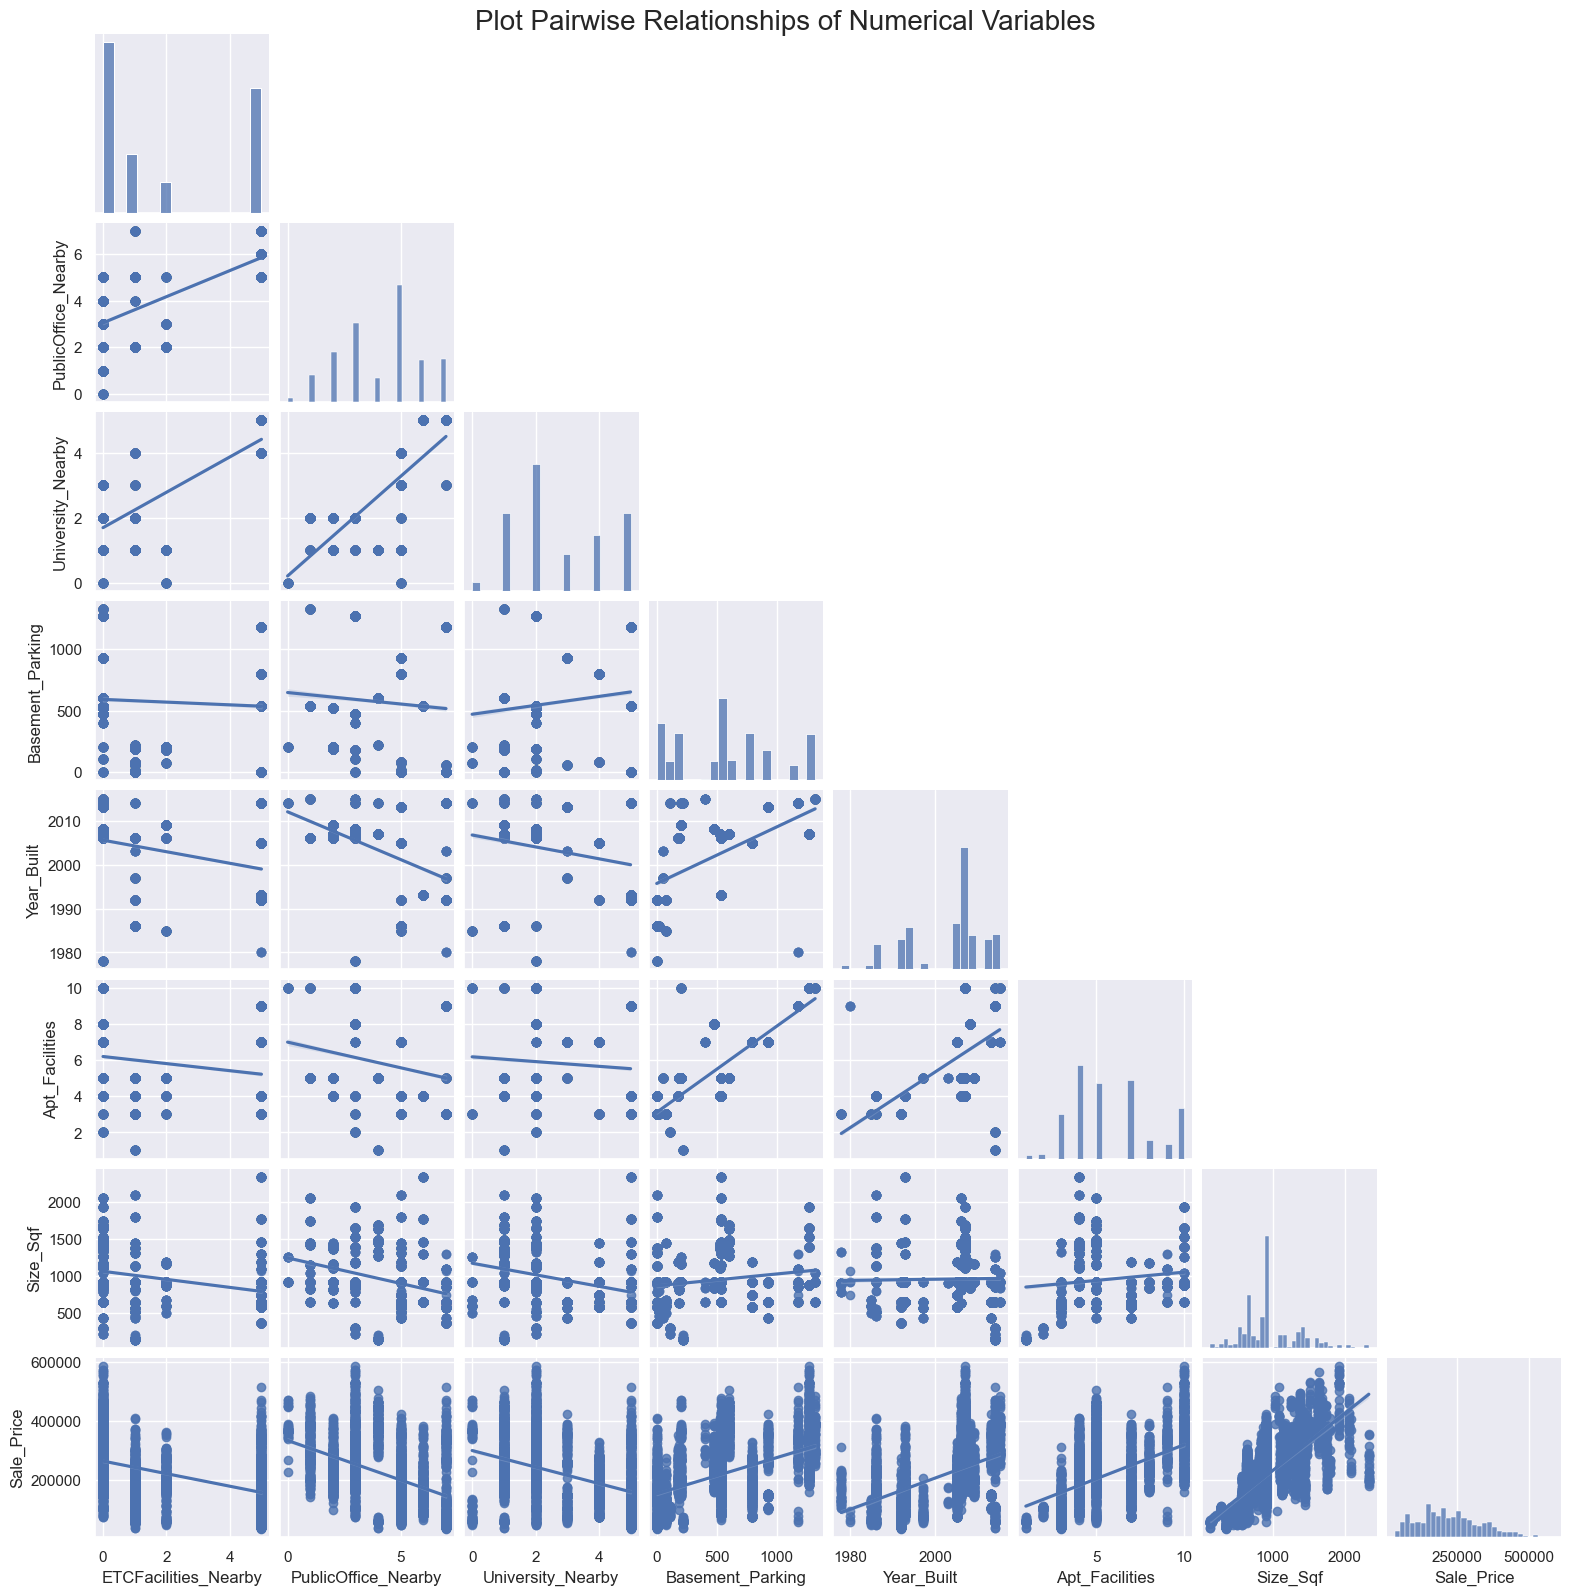

In [174]:
# Melakukan Plot Pairwise Numerical Continue Variable

numerical = [var for var in df.columns if df[var].dtype != 'continue']

sns.set(font_scale=1)
graph = sns.pairplot(df[numerical], height=2.0, corner=True, kind='reg')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=1, fontsize=20)

plt.show()

__Insight :__
* Distribusi data dari mayoritas variabel tidak mengikuti Gaussian
* Variabel Sale_Price, Size_Sqf dan Year_Built termasuk variabel continue. Sedangkan ETCFacilities_Nearby, PublicOffice_Nearby, University_Nearby, Basement_Parking, Apt_Facilities adalah variabel deskret
* Hubungan antara variabel Sale_Price dan Size_Sqf membentuk pola linear.
* Mayoritas sebaran data cenderung tinggi


#### **Data Understanding by Hallway_Type**


Hallway_Type,corridor,mixed,terraced
Hallway_Type,464,1131,2528


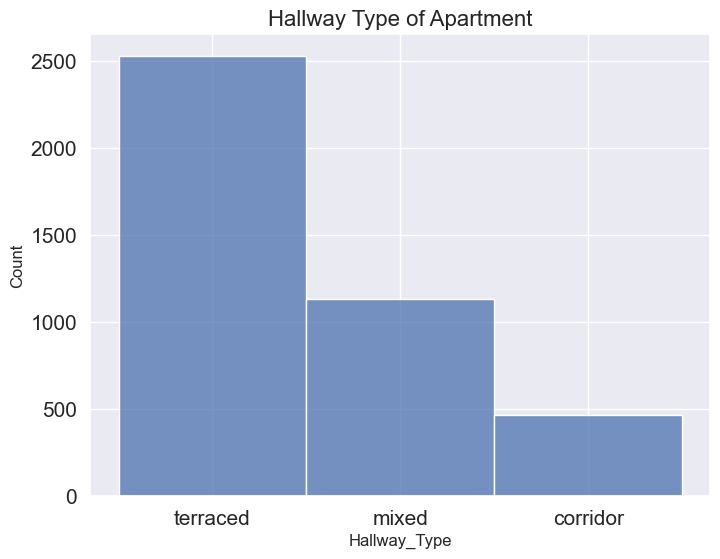

In [175]:
# Cek relationship Sale_Price untuk tiap Hallway type
dfCount_Saleprice = df.groupby('Hallway_Type').agg({'Hallway_Type':'count'})
display(dfCount_Saleprice.T)

plt.figure(figsize=(8,6))
sns.histplot(df['Hallway_Type'], palette='crest')
plt.title('Hallway Type of Apartment', size=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15) 

plt.show()

* Apartment dengan tipe terbanyak pertama adalah terraced berjumlah 2528 unit apartment.
* Apartment dengan tipe terbanyak kedua adalah mixed berjumlah 1131 unit apartment.
* Apartment dengan tipe paling sedikit adalah corridor berjumlah 464 unit apartment. 

**Hallway_Type dan Year_Build Relationship Check**

Text(0.5, 1.0, 'Hallway Type VS Year Built')

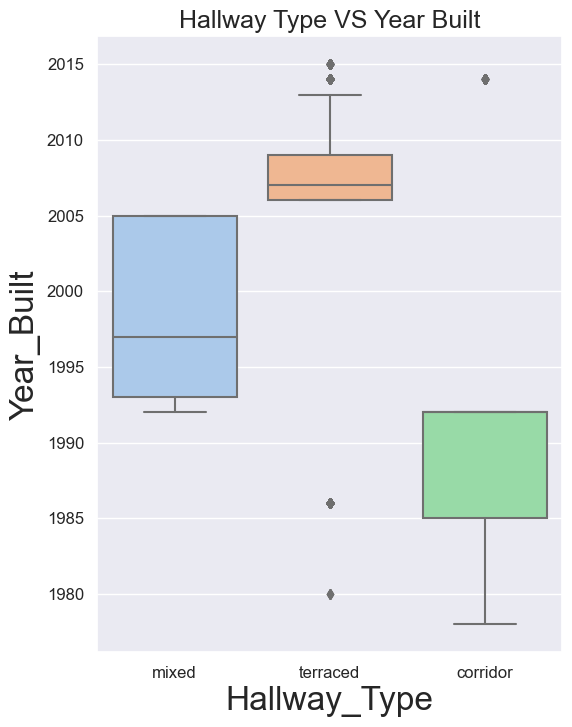

In [291]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Hallway_Type', y='Year_Built', data=df, palette='pastel')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.title('Hallway Type VS Year Built', size=18)

* Apartment bertipe Hallway Corridor banyak dibangun pada tahun 1995 kebawah.
* Apartment bertipe Hallway Mixed banyak dibangun pada tahun 1995 sampai dengan 2005.
* Apartment bertipe Hallway Terraced banyak dibangun pada tahun 2005 keatas.
* Untuk tahun terbaru pada 2005 keatas apartment tipe Hallway Mixed dan Corridor sudah jarang dibangun. 

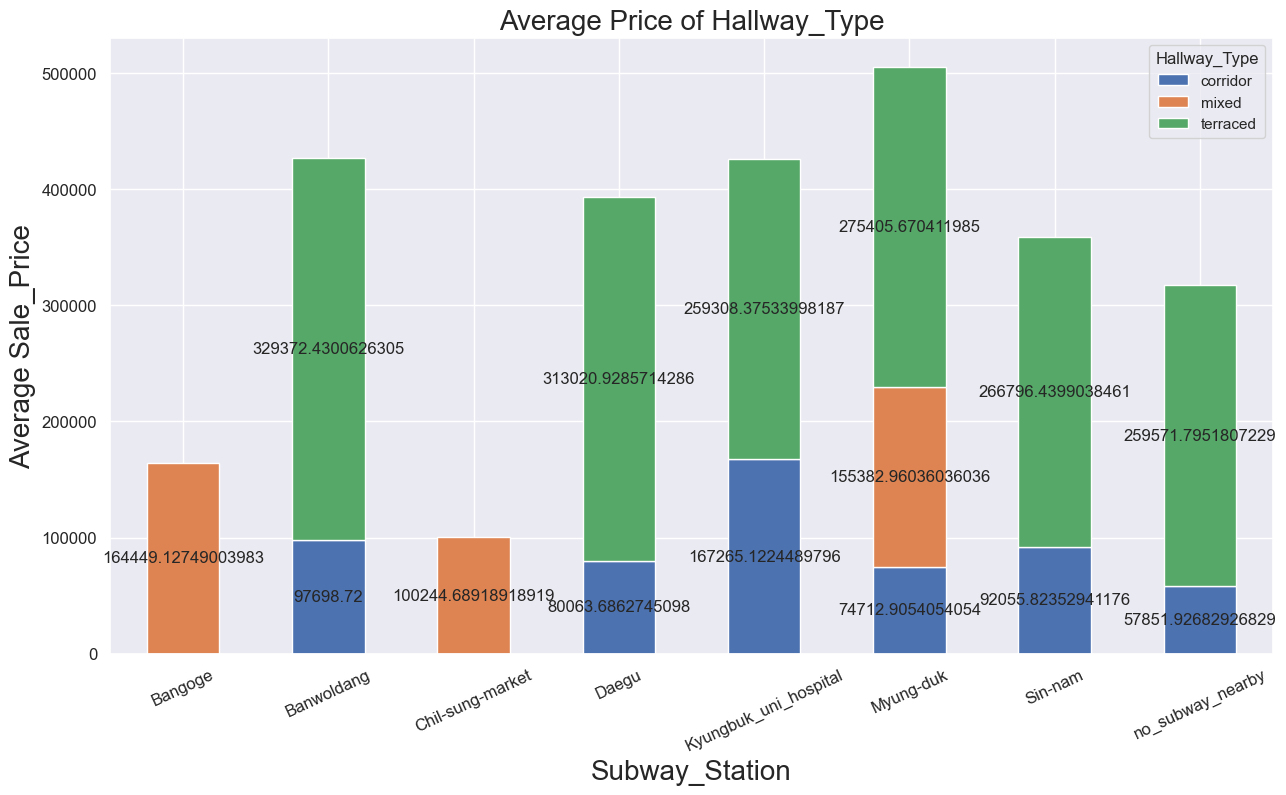

In [177]:
# Grouping apartment berdasarkan tipe hallway dan subway station terdekat

table = df.pivot_table(index='Subway_Station', columns='Hallway_Type', values='Sale_Price', aggfunc='mean')

mean_price = table.plot(kind='bar', stacked=True, figsize=(15,8), fontsize=15)
for i in mean_price.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in i]
    mean_price.bar_label(i, labels=labels, label_type='center', fontsize=12)
plt.xlabel('Subway_Station', fontsize=20)
plt.ylabel('Average Sale_Price', fontsize = 20)
plt.title('Average Price of Hallway_Type', fontsize=20)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

Pada Grafik diatas menunjukan bahwa harga sewa apartment bertipe **Corridor** mempunyai rata-rata harga yang paling rendah dibandingkan tipe **Mixed**. Pada Apartment bertipe **Terraced** harga sewanya secara rata-rata lebih besar dibandingkan **Corridor** dan **Mixed**.
Selain itu apartment yang mempunyai jarak dekat dengan **Subway Station Myung-duk** mempunyai harga tertinggi. 

#### **Relationship Sale_Price dengan Year_Built & Apt_Facilities**

In [178]:
df.groupby(['Year_Built', 'Apt_Facilities'])['Sale_Price'].median()


Year_Built  Apt_Facilities
1978        3                 163716.0
1980        9                  69468.5
1985        3                  70796.0
1986        3                  87610.0
            4                 184955.0
1992        3                  82300.0
1993        4                 155752.0
1997        5                  85398.0
2003        5                 123893.0
2005        7                 167035.0
2006        4                 210619.0
            5                 252212.0
2007        4                 263273.5
            5                 383185.0
            10                338495.5
2008        8                 236283.0
2009        5                 203646.0
2013        7                 150778.0
2014        1                  58407.0
            2                 101769.0
            9                 325221.0
            10                366813.5
2015        7                 300884.0
            10                376769.5
Name: Sale_Price, dtype: float64

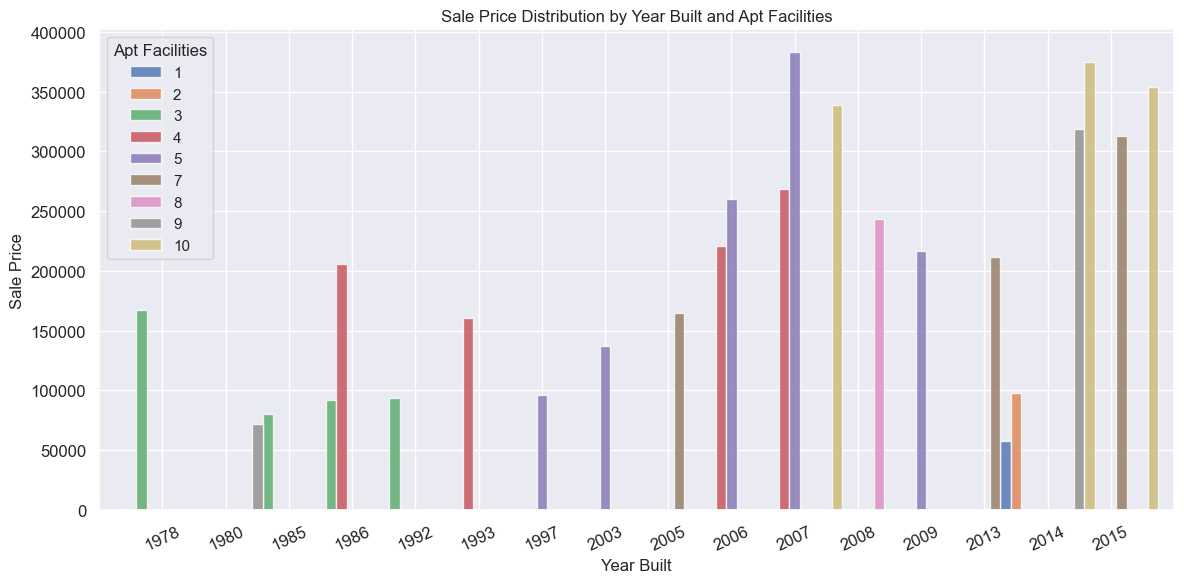

In [179]:
# Group data dari 'Year_Built' dan 'Apt_Facilities', dan kalkulasi dari nilai mean 'Sale_Price'
grouped_data = df.groupby(['Year_Built', 'Apt_Facilities'])['Sale_Price'].mean().reset_index()

# Pivot tabel untuk menjadikan 'Apt_Facilities' sebagai kolom dan 'Year_Built' sebagai indeks
pivot_table = grouped_data.pivot(index='Year_Built', columns='Apt_Facilities', values='Sale_Price')

# Create grafik histogram
fig, ax = plt.subplots(figsize=(12, 6))
pivot_table.plot(kind='bar', ax=ax, alpha=0.8, width=1.5)

# Customize plot
ax.set_title('Sale Price Distribution by Year Built and Apt Facilities')
ax.set_xlabel('Year Built')
ax.set_ylabel('Sale Price')
ax.legend(title='Apt Facilities')
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

# Show plot
plt.tight_layout()
plt.show()

Berdasar pengecekan Tabel dan Grafik Bar Plot diatas menunjukan bahwa semakin banyak jumlah apartment facilities akan semakin mahal biaya sewa pada apartment. Pola tersebut dapat diamati pada setiap tahun pembuatan (Year_Built) dari apartment.

#### **Relationship Size_Sqf (Ukuran Apartment) dengan Harga Apartment Berdasarkan Tipe Apartment**

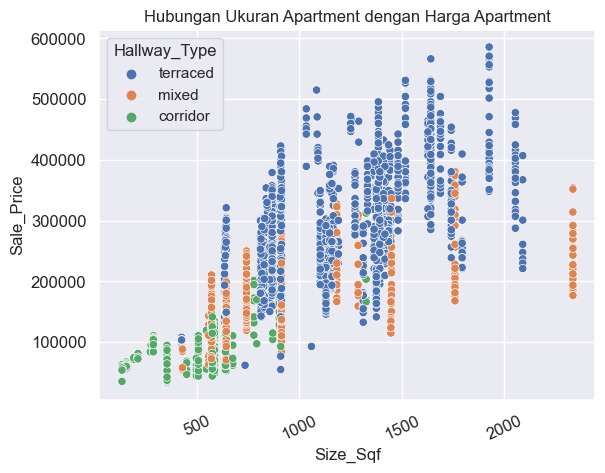

In [180]:
# Hubungan ukuran apartmen dengan harga apartment berdasarkan tipe apartment

sns.scatterplot(data=df,x='Size_Sqf',y='Sale_Price',hue='Hallway_Type')
plt.title('Hubungan Ukuran Apartment dengan Harga Apartment')
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

Berdasarkan grafik diatas didapat sebuah insignt bahwa :
* Jenis apartment terraced memiliki Sale_Price yang lebih tinggi dibandingkan tipe apartment mixed dan corridor
* Jenis apartment terraced dan mixed memiliki cenderung memiliki Size_Sqf yang luas, sedang tipe apartment corridor memiliki luas apartment yang lebih sempit 

#### **Relationship Sale_Price dengan Time_To_Subway**

Pada pengecekan data selanjutkan akan menunjukan seberapa tinggi relationship Time_To_Subway terhadap Sale_Price.

Time_To_Subway,0-5min,10min-15min,15min-20min,5min-10min,no_bus_stop_nearby
Time_To_Subway,1196,426,394,501,100


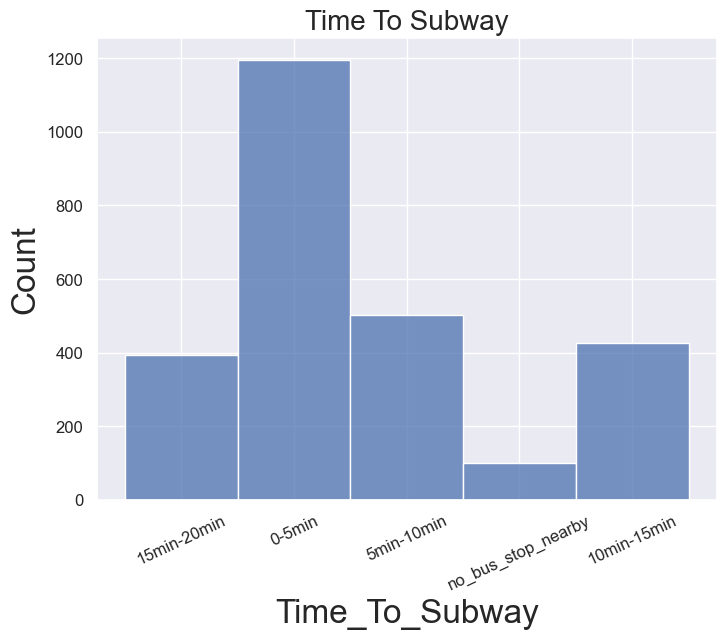

In [293]:
# Cek median sale price untuk tiap Hallway type
df_price_timesubway = df.groupby('Time_To_Subway').agg({'Time_To_Subway':'count'})
display(df_price_timesubway.T)

plt.figure(figsize=(8,6))
sns.histplot(df['Time_To_Subway'], palette='crest')
plt.title('Time To Subway', size=20)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 

plt.show()

Sebagian besar unit apartment memiliki jarak yang dekat dengan Subway Station, hal ini dapat diketahui dari jumlah Time_To_Subway **0-5min** mempunyai data terbanyak sebesar **1953** unit apartment. Selanjutnya kita akan check relationship masing-masing kategori Time_To_Subway dengan Sale_Price.

In [182]:
# Membuat kategori time to subway berdasarkan waktu yang dibutuhkan untuk mencapai subway station

subway_paling_cepat = pd.DataFrame(df[df['Time_To_Subway'] == '0-5min'])
subway_cepat = pd.DataFrame(df[df['Time_To_Subway'] == '5min-10min'])
subway_sedang = pd.DataFrame(df[df['Time_To_Subway'] == '15min-20min'])
subway_lama = pd.DataFrame(df[df['Time_To_Subway'] == '10min-15min'])
subway_tidak_ada = pd.DataFrame(df[df['Time_To_Subway'] == 'no_bus_stop_nearby'])

In [183]:
# Melakukan perhitungan mean pada masing-masing kategori Time_To_Subway

mean_subway_paling_cepat = subway_paling_cepat['Sale_Price'].mean()
mean_subway_cepat = subway_cepat['Sale_Price'].mean()
mean_subway_sedang = subway_sedang['Sale_Price'].mean()
mean_subway_lama = subway_lama['Sale_Price'].mean()
mean_subway_tidak_ada = subway_tidak_ada['Sale_Price'].mean()

In [296]:
data_sub = [['subway_paling_cepat', mean_subway_paling_cepat], ['subway_cepat', mean_subway_cepat], ['subway_sedang', mean_subway_sedang], ['subway_lama', mean_subway_lama], ['subway_tidak_ada', mean_subway_tidak_ada]]
harga_sub = pd.DataFrame(data_sub, columns=['Kategori Waktu', 'Mean Sale_Price'])
harga_sub

,Kategori Waktu,Mean Sale_Price
0,subway_paling_cepat,287089.029186
1,subway_cepat,165900.942821
2,subway_sedang,148896.104928
3,subway_lama,158498.365352
4,subway_tidak_ada,216608.479532


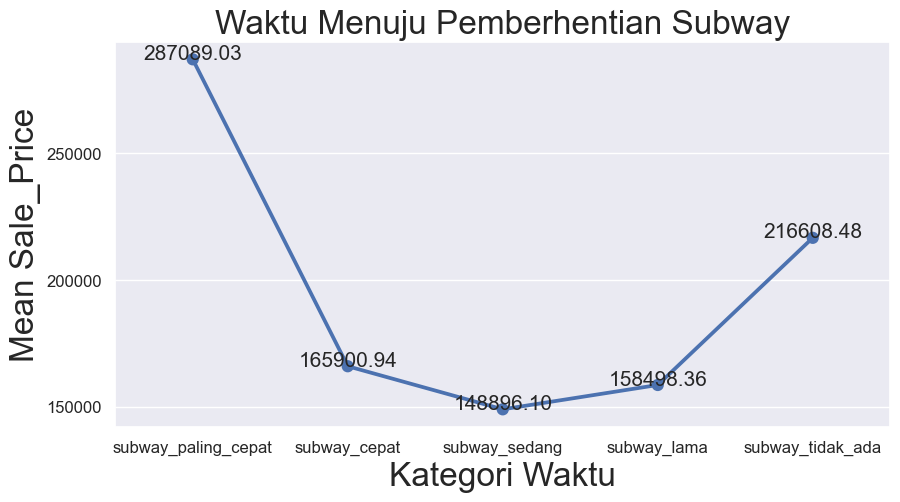

In [299]:
# Data harga_sub
data = {
    'Kategori Waktu': ['subway_paling_cepat', 'subway_cepat', 'subway_sedang', 'subway_lama', 'subway_tidak_ada'],
    'Mean Sale_Price': [287089.029, 165900.942, 148896.104, 158498.365, 216608.479]
}

harga_sub = pd.DataFrame(data)

plt.subplots(figsize=(10,5))
sns.pointplot(x='Kategori Waktu', y='Mean Sale_Price', data=harga_sub)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 
plt.title('Waktu Menuju Pemberhentian Subway', size=24)

# Menambahkan keterangan nilai pada setiap titik
for index, row in harga_sub.iterrows():
    plt.text(row.name, row['Mean Sale_Price'], f'{row["Mean Sale_Price"]:.2f}', ha='center', fontsize=15)

plt.show()


Berdasar line graphic didapatkan insight bahwa waktu tempuh yang dibutuhkan menuju Subway Station berpengaruh pada harga sewa apartment. Hal ini ditunjukan dalam grafik bahwa unit apartment yang memiliki waktu tempuh paling cepat ( 0 - 5 menit) memiliki harga yang paling tinggi. Walaupu cenderung terjadi kenaikan pada unit apartment yang memiliki waktu tempuh lama (10 menit - 15 menit). Namun, pada lokasi apartement yang tidak memiliki Subway Station terdekat memiliki harga yang lebih tinggi dari apartement dengan kategori Subway Station Cepat, Sedang dan Lama dan masih lebih rendah dari lokasi yang sangat dekat dengan Subway.

#### **Relationship Harga Sewa dengan Tahun Pembuatan Apartment**

Pada pengecekan data selanjutnya akan mencoba mengetahui untuk relationship Harga Sewa (Sale_Price) dengan Tahun Pembuatan Apartment (Year_Built).

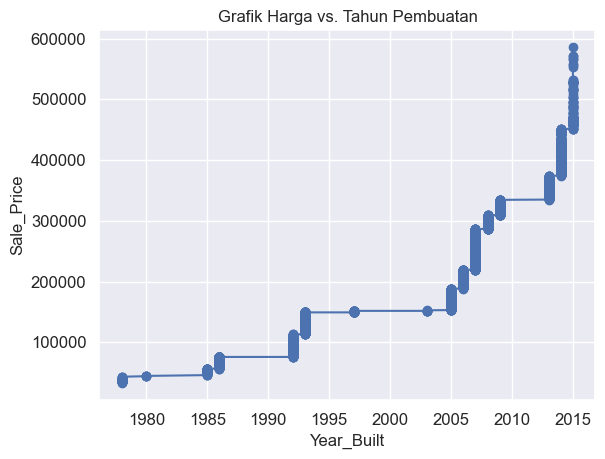

In [186]:
# Membuat line plot
plt.plot(df['Year_Built'].sort_values(), df['Sale_Price'].sort_values(), marker='o', linestyle='-', color='b')

# Menambahkan judul dan label sumbu
plt.title('Grafik Harga vs. Tahun Pembuatan')
plt.xlabel('Year_Built')
plt.ylabel('Sale_Price')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

Didapatkan insight bahwa semakin baru tahun pembuatan apartment harga sewa apartment juga semakin tinggi. Sehingga dapat ditarik kesimpulan bahwa hubungan Year_Built terhadap Sale_Price adalah tinggi.

#### **Jumlah apartment berdasarkan fitur numerikal**

In [187]:
# Fitur-fitur numerikal
num_feature = df.select_dtypes(exclude='object').columns
num_feature

Index(['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby',
       'Basement_Parking', 'Year_Built', 'Apt_Facilities', 'Size_Sqf',
       'Sale_Price'],
      dtype='object')

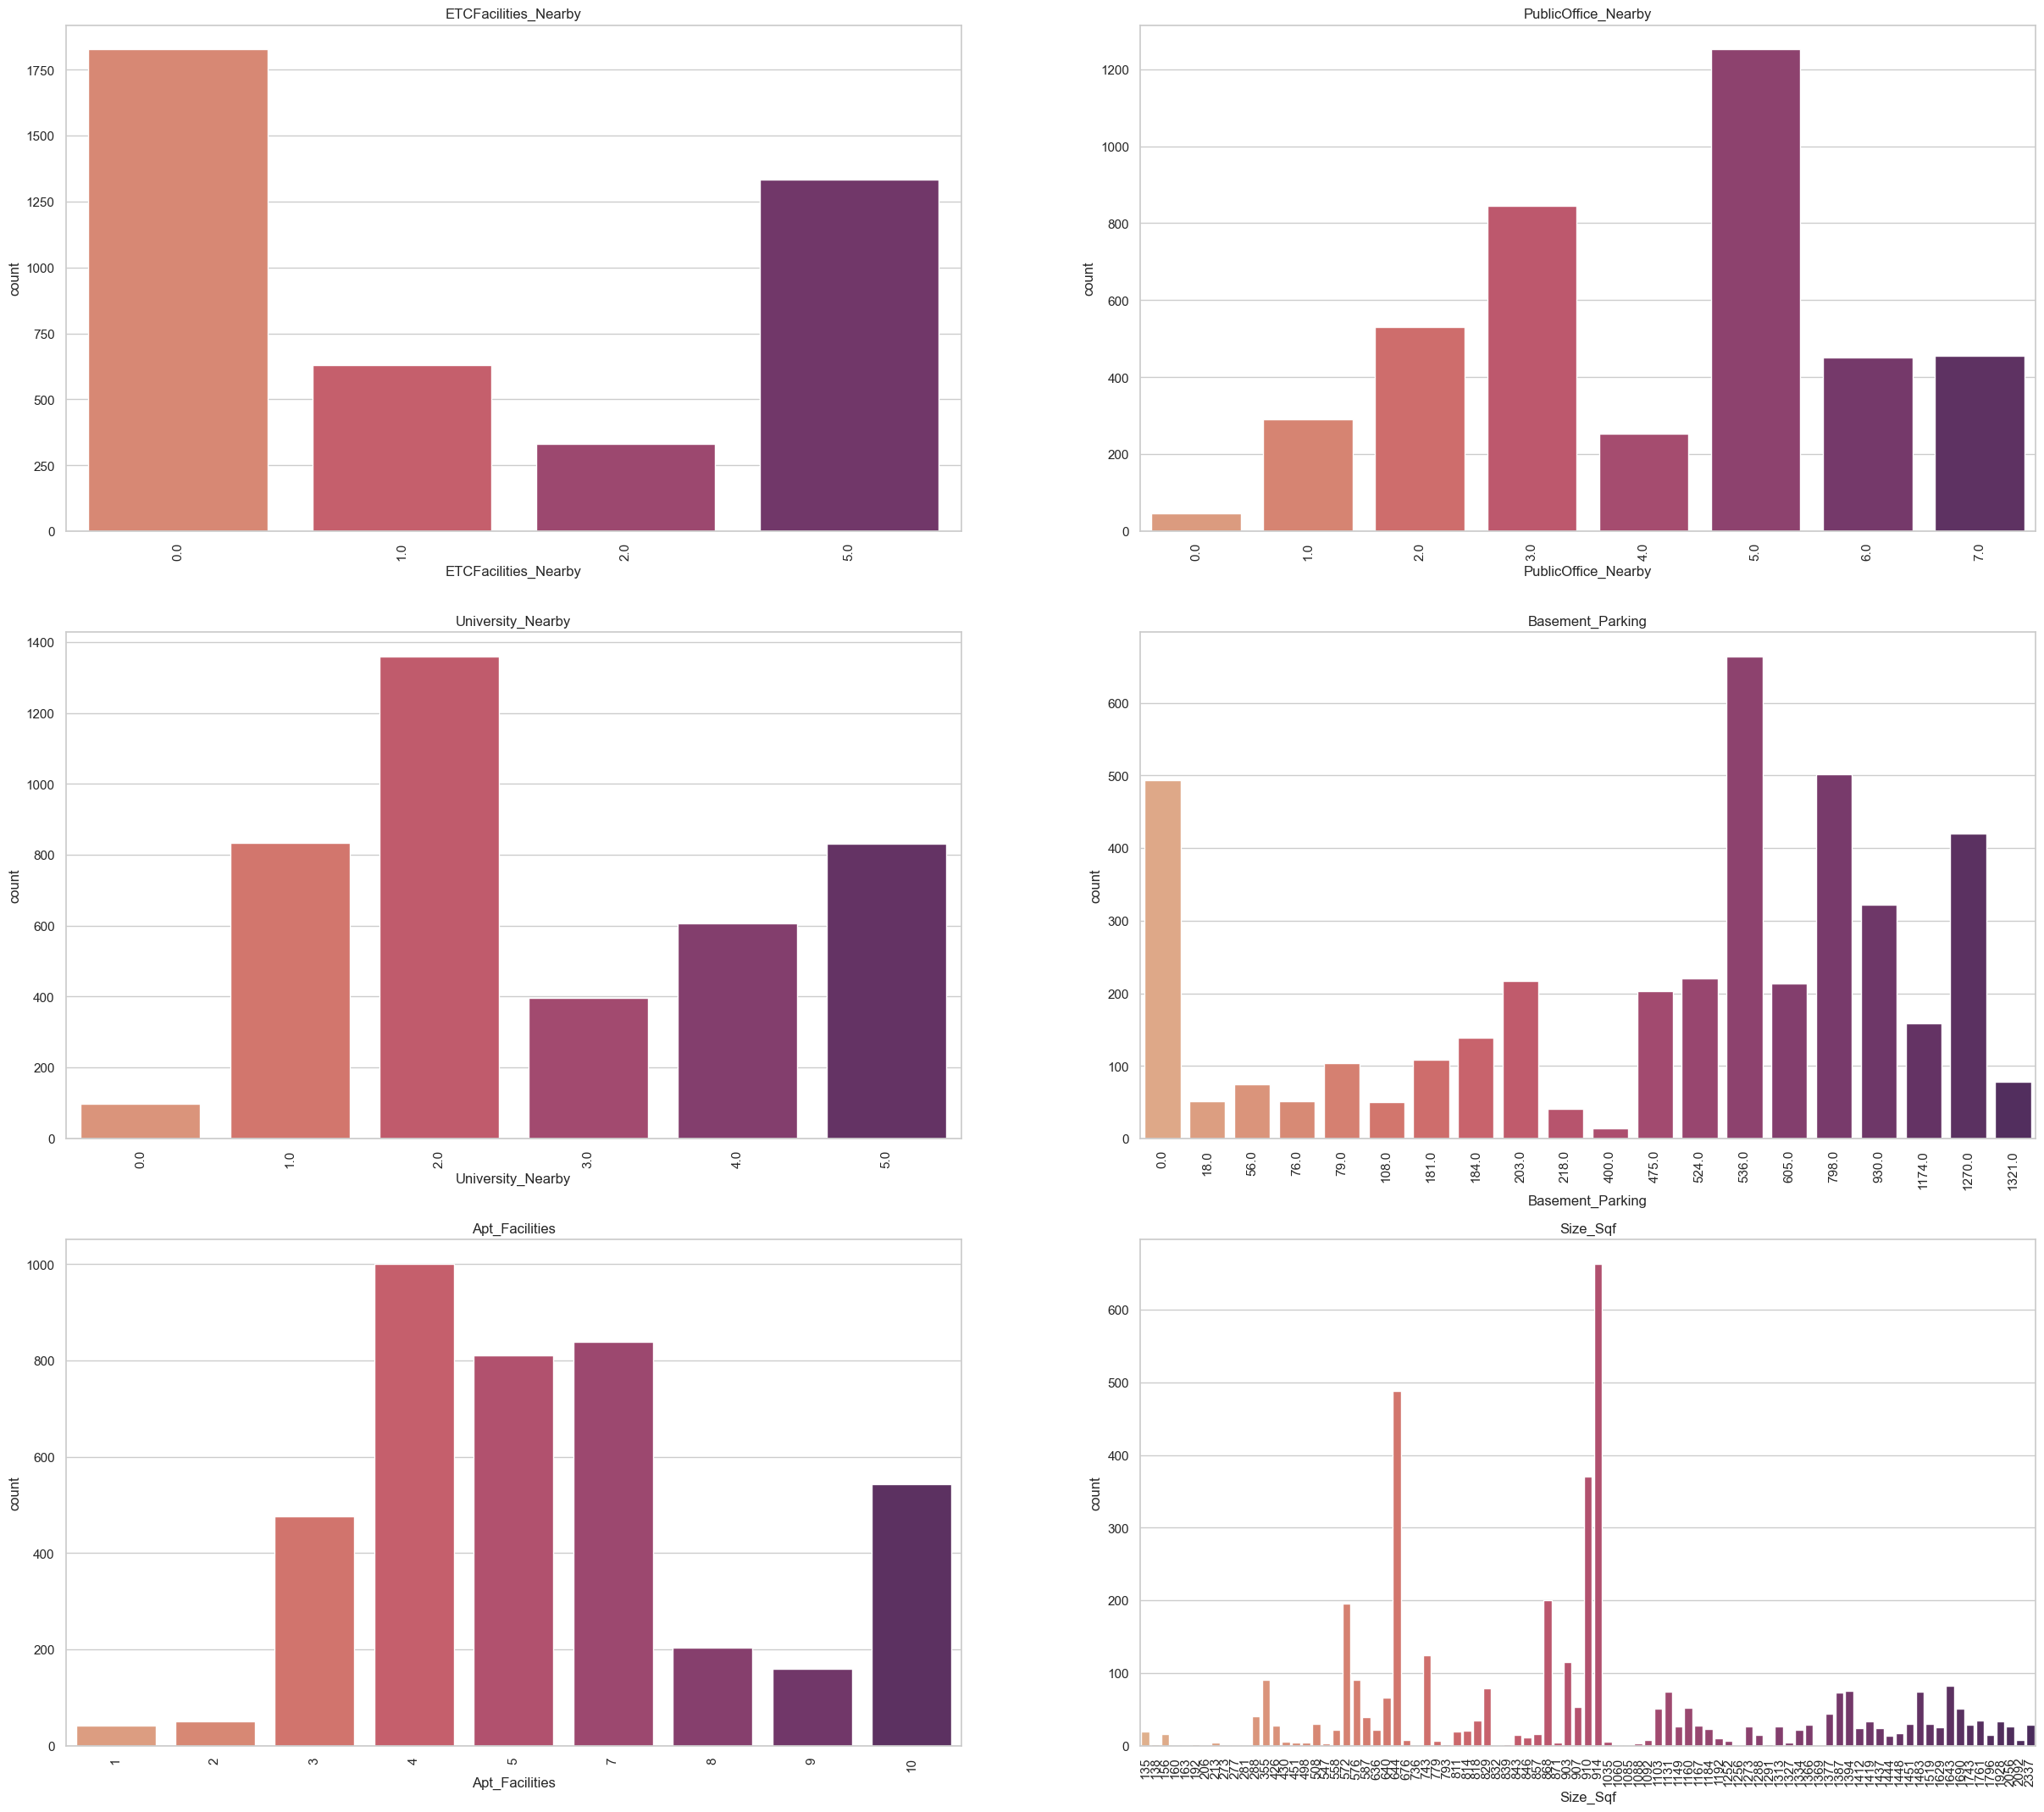

In [188]:
plt.figure(figsize=(30,45))
sns.set(style='whitegrid')
i = 1
for col in num_feature.drop(['Sale_Price','Year_Built']):
    plt.subplot(5,2,i)
    sns.countplot(data = df, x  = col, palette='flare')
    plt.xticks(rotation=90)
    plt.title(df[col].name)
    i+=1

* Lebih banyak apartment yang tidak memiliki fasilitas terdekat (ETCFacilities_Nearby)
* Apartment yang memiliki jarak terdekat dengan 5 fasilitas public office terdekat jumlahnya lebih banyak dibandingkan jumlah fasilitas yang lainnya.
* Apartment yang memiliki jarak terdekat dengan 2 Universitas jumlahnya lebih banyak dibandingkan jumlah Universitas yang lainnya.
* Apartment yang memiliki jumlah fasilitas sebanyak 4 fasilitas mempunyai jumlah yang lebih banyak dibandingkan jumlah fasilitas yang lainnya.

## **`3. Data Preprocessing`**

### **Check & Handling Missing Value**

Melakukan pengecekan Missing Value menggunakan fungsi msno.

<Axes: >

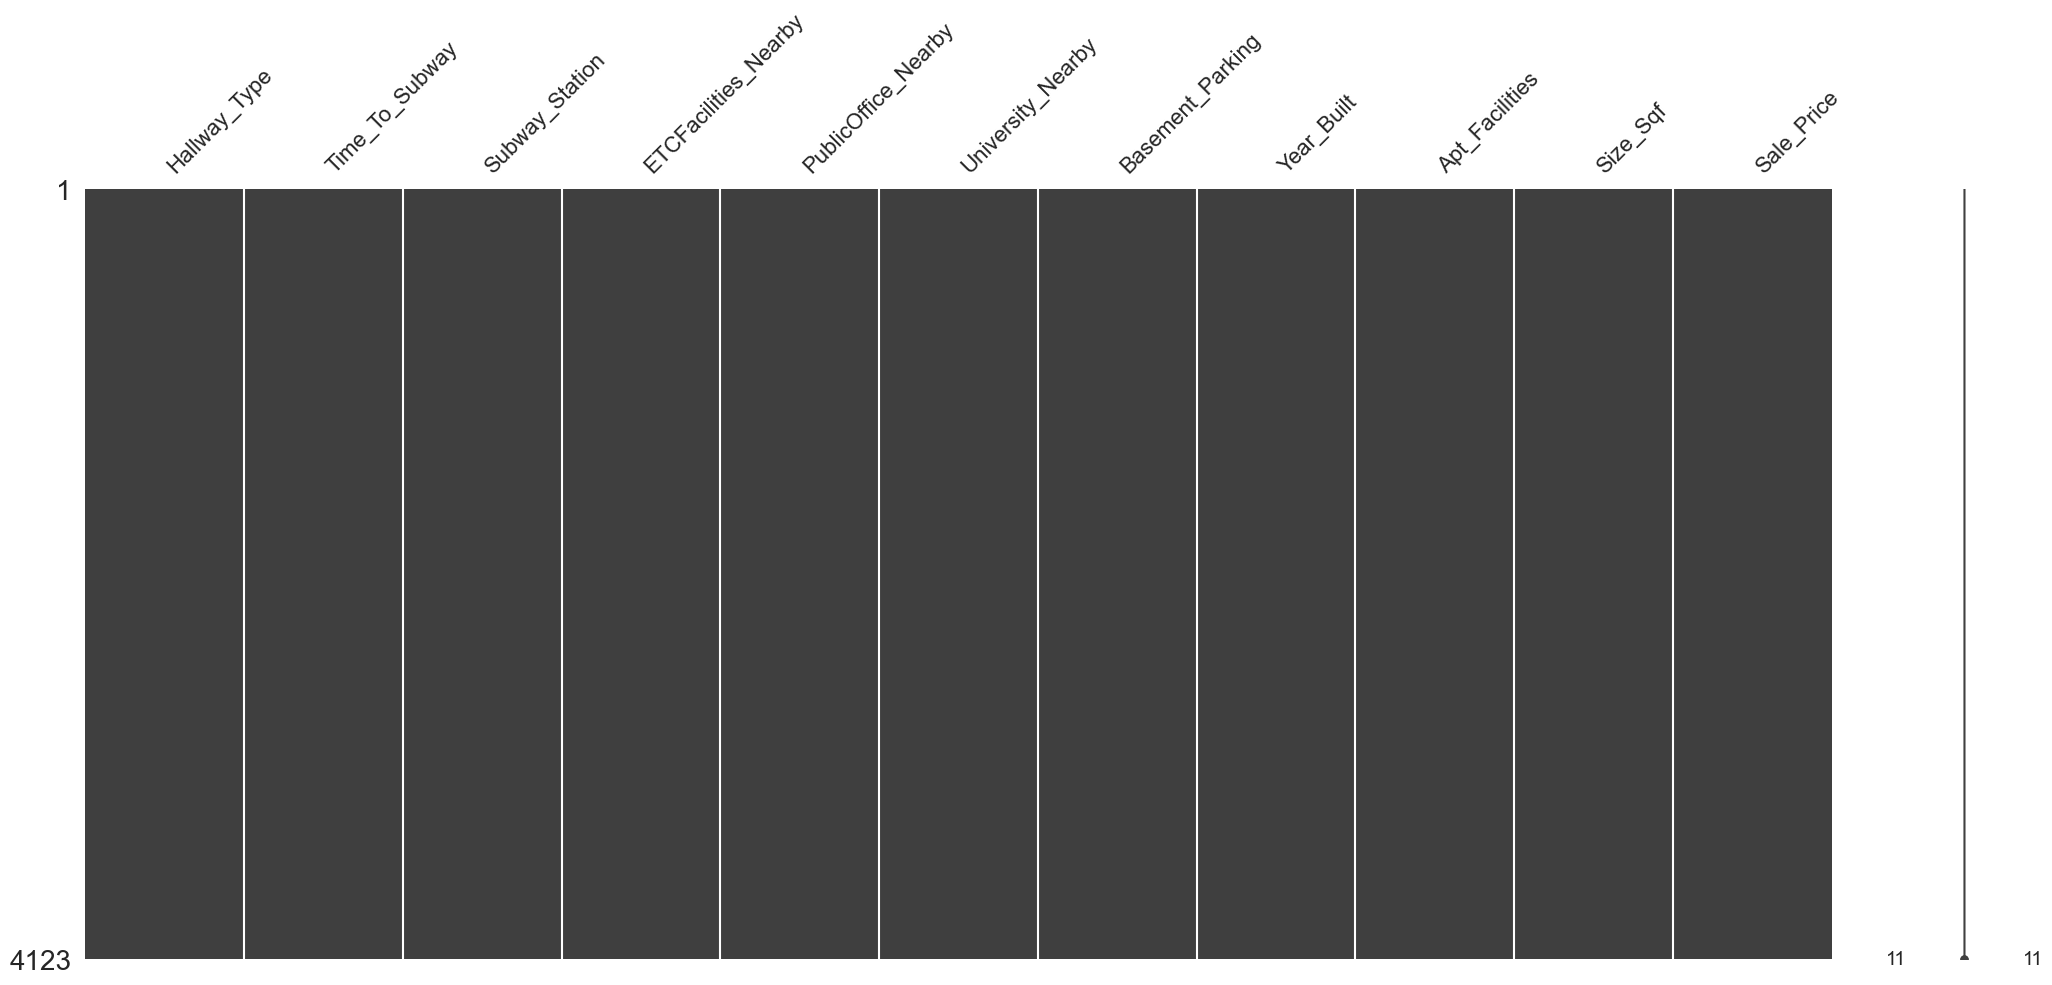

In [189]:
# Cheking if any missing value from the database

msno.matrix(df)

Pada dataset **data_daegu_apartment**, setelah dilakukan pengecekan terdapat 11 columns, 4123 rows. Pada dataset tersebut tidak terdapat adanya missing value.

### **Check & Handling Duplicate Data**

In [190]:
# check jumlah dari duplicated values
df.duplicated().sum()

1422

In [191]:
# drop duplicated values
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)
df

,Hallway_Type,Time_To_Subway,Subway_Station,ETCFacilities_Nearby,PublicOffice_Nearby,University_Nearby,Basement_Parking,Year_Built,Apt_Facilities,Size_Sqf,Sale_Price
0,mixed,15min-20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
1,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
2,mixed,15min-20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,118584
3,mixed,5min-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,572,143362
4,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,910,172566
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2697,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
2698,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
2699,corridor,5min-10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [192]:
# Rechecking number of duplicated values
duplicateVal = df.duplicated().sum()
print (f'Setelah dilakukan proses delete duplicate, saat ini terdapat {duplicateVal} data terduplikasi.')

Setelah dilakukan proses delete duplicate, saat ini terdapat 0 data terduplikasi.


Setelah dilakukan pengecekan duplikat, terdapat sebanyak 1422 data duplicated data. Lalu step yang sudah dilalukan melakukan delete data duplicate dengan keep salah satu data.
Sehingga data terduplicate saat ini adalah 0.

### **Check & Handling Outliers Data**

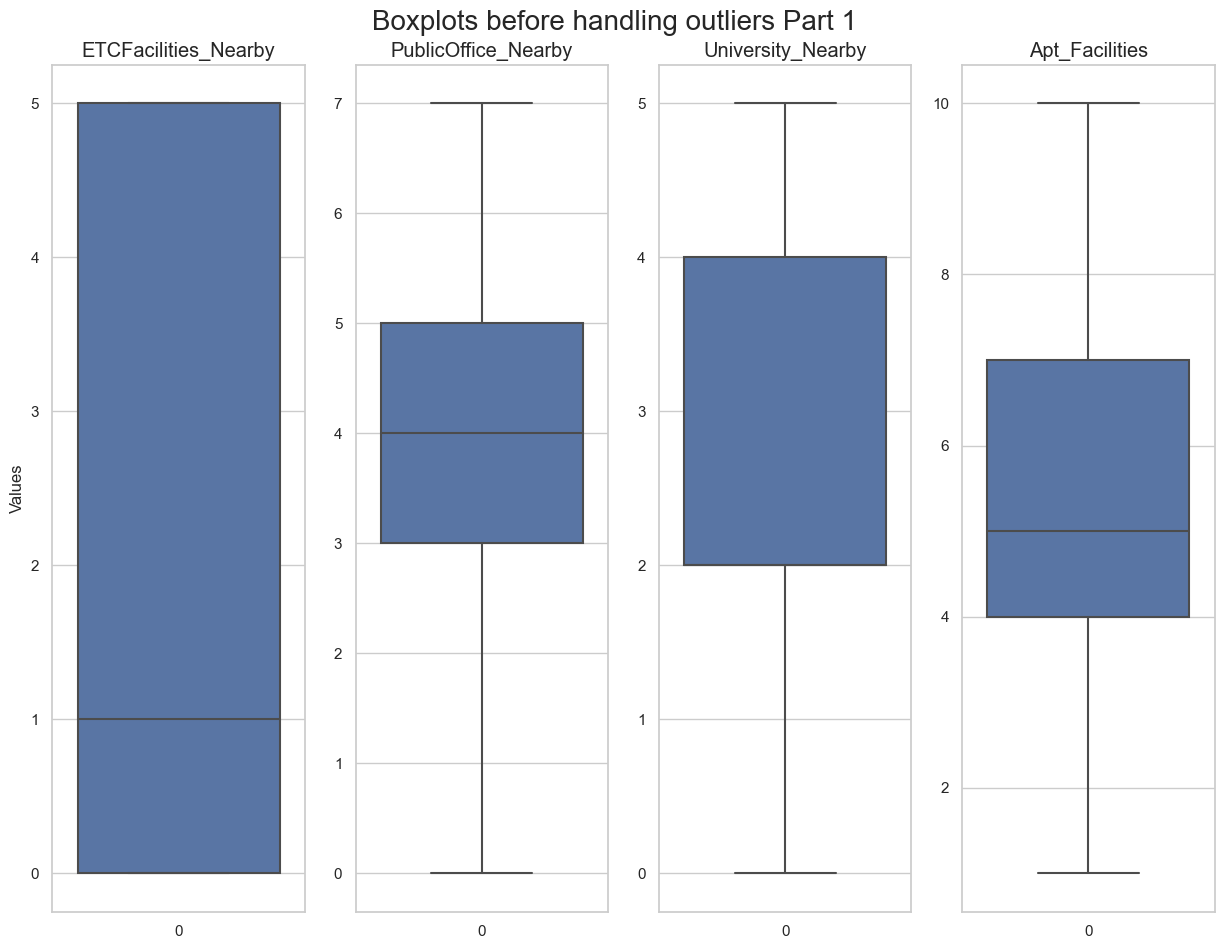

In [193]:
#list numeric columns dari dataset

numeric_columns = ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Apt_Facilities']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(15,11)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=20)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
            sns.set(font_scale=1.2)
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom (dataset=df, columns_list=numeric_columns, rows=1, cols=4, suptitle='Boxplots before handling outliers Part 1')

Pada dataset **"data_daegu_apartment"** kolom **ETCFacilities_Nearby, PublicOffice_Nearby, University_Nearby, Apt_Facilities** tidak terdapat data Outliers.

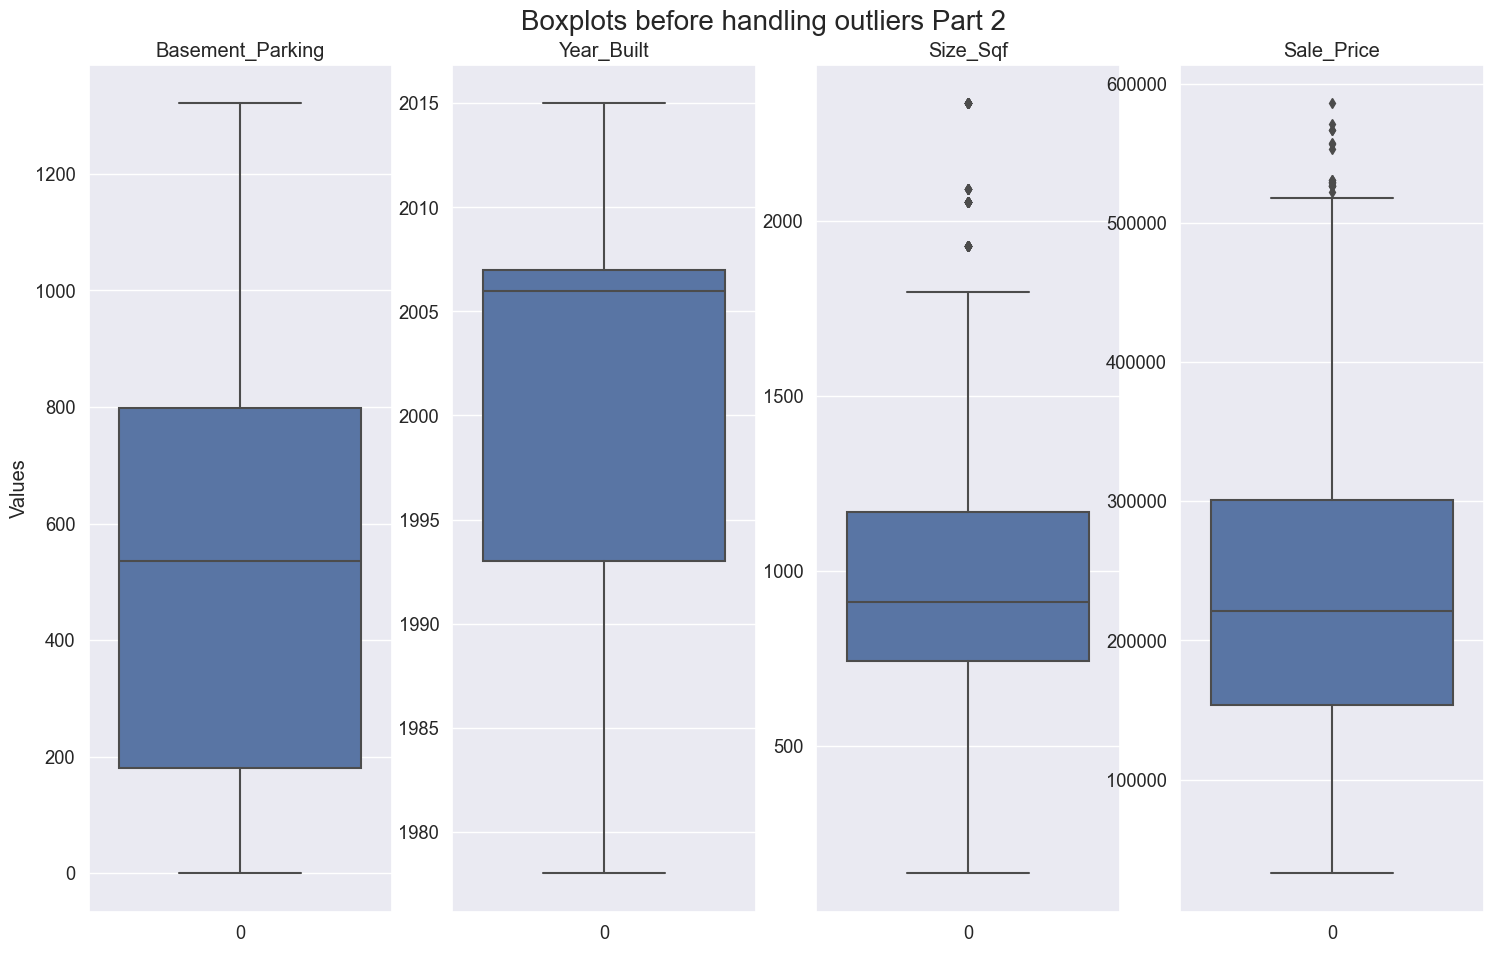

In [194]:
#list numeric columns dari dataset

numeric_columns = ['Basement_Parking', 'Year_Built', 'Size_Sqf','Sale_Price']

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(18,11)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=20)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
            sns.set(font_scale=1.2)
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom (dataset=df, columns_list=numeric_columns, rows=1, cols=4, suptitle='Boxplots before handling outliers Part 2')

Pada dataset **"data_daegu_apartment"** ini terdapat 2 kolom yang terdapat data outlier yaitu **Size_Sqf** dan **Sale_Price**, karena untuk setiap prediksi dari model yang masih mempunyai data outliers akan bernilai menjadi bias. Oleh karena itu perlu dilakukan handling data outliers pada kedua kolom **Size_Sqf** dan **Sale_Price** dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan dataset yang sudah clean. 

### **Handling Outlier Pada Kolom Size_Sqf**

**Distribution Plot of Daegu Apartment Size (Size_Sqf)**

Pertama kita check terlebih dahulu untuk pola distribusi dan kolom mana saja yang mempunyai data outliers berdasarkan upperbound/ batas atas dari data Size_Sqf (Size Apartment).

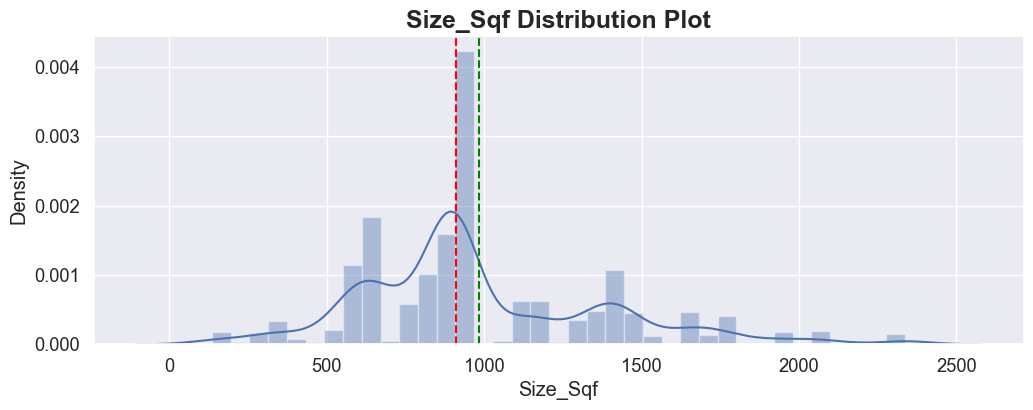

In [197]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Size_Sqf'])
sns.set(font_scale=1.2)
plt.title('Size_Sqf Distribution Plot', size=18, weight='bold')
plt.axvline(df["Size_Sqf"].median() #The median line
            , linestyle="--",
            color="red")
plt.axvline(df["Size_Sqf"].mean() #The mean line
            , linestyle="--",
            color="green")

Berdasar dari plot grafik kolom Size_Sqf, plotting median dan mean dapat disimpulkan bahwa data Size_Sqf tidak terdistribusi normal. Dengan pola distribusi Sckewed Right, oleh karena itu perlu dilakukan handling data pada kolom Size_Sqf ini.

In [198]:
# Calculate for each quantile of Size_Sqf to replace the outliers in the "Size_Sqf" column.

q1_size = np.percentile (df['Size_Sqf'], 25, interpolation='midpoint')
q2_size = np.percentile (df['Size_Sqf'], 50, interpolation='midpoint')
q3_size = np.percentile (df['Size_Sqf'], 75, interpolation='midpoint')

iqr_size = (q3_size - q1_size)

lowerbound_size = q1_size - (1.5 *iqr_size)
upperbound_size = q3_size + (1.5 *iqr_size)

outliersSize = df['Size_Sqf'][df['Size_Sqf'] > upperbound_size].count()
outliersPercent_Size = outliersSize  / len(df) * 100

print (f'Q1 quantile of the Size_Sqf : {q1_size}')
print (f'Q2 quantile of the Size_Sqf : {q2_size}')
print (f'Q3 quantile of the Size_Sqf : {q3_size}')
print (f'IQR of Size_Sqf : {iqr_size}')
print (f'Lower Outliers Limit of Size_Sqf : {lowerbound_size}')
print (f'Upper Outliers Limit of Size_Sqf : {upperbound_size}')  
print (f"Amount of outliers Size_Sqf: {outliersSize}")
print (f"Percentage of outliers Size_Sqf: {outliersPercent_Size.round(2)}%")

Q1 quantile of the Size_Sqf : 743.0
Q2 quantile of the Size_Sqf : 910.0
Q3 quantile of the Size_Sqf : 1167.0
IQR of Size_Sqf : 424.0
Lower Outliers Limit of Size_Sqf : 107.0
Upper Outliers Limit of Size_Sqf : 1803.0
Amount of outliers Size_Sqf: 84
Percentage of outliers Size_Sqf: 3.11%


In [199]:
# Check the data of Income column that have value higher that upperbound, we call it as outliers

sizeOutliers = df.loc[df['Size_Sqf'] >= upperbound_size].sort_values(["Sale_Price"],ascending=False)
sizeOutliers

,Hallway_Type,Time_To_Subway,Subway_Station,ETCFacilities_Nearby,PublicOffice_Nearby,University_Nearby,Basement_Parking,Year_Built,Apt_Facilities,Size_Sqf,Sale_Price
1158,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840
1683,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
120,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
2175,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,557522
2534,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637
...,...,...,...,...,...,...,...,...,...,...,...
1166,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
2607,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,193805
1473,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,190265
1105,mixed,15min-20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,185840


In [200]:
# Drop data outlier pada 'Sale_Price'
df = df[df['Size_Sqf'] <= upperbound_size]

In [201]:
# Check the data of Income column that have value higher that upperbound

sizeOutliers = df.loc[df['Size_Sqf'] >= upperbound_size].sort_values(["Size_Sqf"],ascending=False)
sizeOutliers

,Hallway_Type,Time_To_Subway,Subway_Station,ETCFacilities_Nearby,PublicOffice_Nearby,University_Nearby,Basement_Parking,Year_Built,Apt_Facilities,Size_Sqf,Sale_Price


Sudah tidak terdapat nilai dari Size_Sqf yang mempunyai nilai Outliers.

### **Handling Outlier Pada Kolom Sale_Price**

**Distribution Plot of Daegu Apartment Price (Sale_Price)**

Selanjutnya terdapat kolom Sale_Price terdapat data outliersnya, Akan kita check terlebih dahulu untuk pola distribusi dan kolom mana saja yang mempunyai data outliers berdasarkan upperbound/ batas atas dari data Sale_Price.

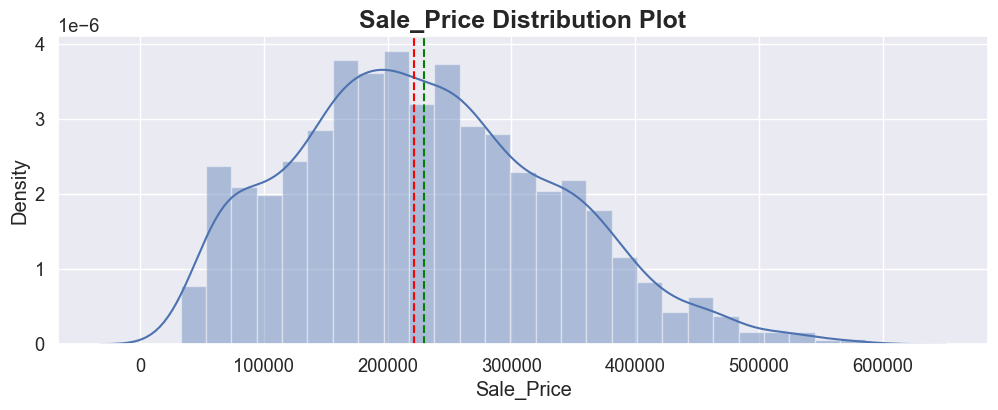

In [195]:
plt.figure(figsize=(12, 4))
sns.distplot(df['Sale_Price'])
sns.set(font_scale=1.2)
plt.title('Sale_Price Distribution Plot', size=18, weight='bold')
plt.axvline(df["Sale_Price"].median() #The median line
            , linestyle="--",
            color="red")
plt.axvline(df["Sale_Price"].mean() #The mean line
            , linestyle="--",
            color="green")

Berdasar dari plot grafik kolom Sale_Price, plotting median dan mean dapat disimpulkan bahwa data Sale_Price tidak terdistribusi normal. Dengan pola distribusi Sckewed Right.

In [196]:
# Calculate for each quantile of Size_Sqf to replace the outliers in the "Size_Sqf" column.

q1_price = np.percentile (df['Sale_Price'], 25, interpolation='midpoint')
q2_price = np.percentile (df['Sale_Price'], 50, interpolation='midpoint')
q3_price = np.percentile (df['Sale_Price'], 75, interpolation='midpoint')

iqr_price = (q3_price - q1_price)

lowerbound_price = q1_price - (1.5 *iqr_price)
upperbound_price = q3_price + (1.5 *iqr_price)

outliersPrice = df['Sale_Price'][df['Sale_Price'] > upperbound_price].count()
outliersPercent_Price = outliersPrice  / len(df) * 100

print (f'Q1 quantile of the Sale_Price : {q1_price}')
print (f'Q2 quantile of the Sale_Price : {q2_price}')
print (f'Q3 quantile of the Sale_Price : {q3_price}')
print (f'IQR of Sale_Price : {iqr_price}')
print (f'Lower Outliers Limit of Sale_Price : {lowerbound_price}')
print (f'Upper Outliers Limit of Sale_Price : {upperbound_price}')  
print (f"Amount of outliers: {outliersPrice}")
print (f"Percentage of outliers: {outliersPercent_Price.round(2)}%")

Q1 quantile of the Sale_Price : 153539.0
Q2 quantile of the Sale_Price : 221238.0
Q3 quantile of the Sale_Price : 300884.0
IQR of Sale_Price : 147345.0
Lower Outliers Limit of Sale_Price : -67478.5
Upper Outliers Limit of Sale_Price : 521901.5
Amount of outliers: 17
Percentage of outliers: 0.63%


Terdapat 17 rows yang mempunyai nilai Sale_Price yang melebihi batas atas (upperbound) dan menjadi outliers dari Sale_Price. Ke 17 outliers tersebut jika dihitung sebagai percentage kesuluruhan data adalah 0.63 % data. Namun karena Sale_Price adalah target dari pemodelan ini, sehingga tidak perlu dilakukan data drop pada Outliers Sale_Price. Karena tidak akan terlalu berpengaruh terhadap hasil pemodelan.

Outliers pada kolom Size_Sqf sudah dihandling dengan cara drop column. Dilakukan pengecekan ulang untuk memastikan kolom Size_Sqf tidak terdapat data outliers.

### **Unique Value Pada Setiap Columns**

In [202]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2617, 11)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,Hallway_Type,object,0.0,False,3,"[mixed, terraced, corridor]"
1,Time_To_Subway,object,0.0,False,5,"[15min-20min, 0-5min, 5min-10min, no_bus_stop_..."
2,Subway_Station,object,0.0,False,8,"[Chil-sung-market, Sin-nam, Bangoge, no_subway..."
3,ETCFacilities_Nearby,float64,0.0,False,4,"[1.0, 0.0, 5.0, 2.0]"
4,PublicOffice_Nearby,float64,0.0,False,8,"[7.0, 1.0, 5.0, 2.0, 3.0, 6.0, 4.0, 0.0]"
5,University_Nearby,float64,0.0,False,6,"[3.0, 2.0, 4.0, 1.0, 5.0, 0.0]"
6,Basement_Parking,float64,0.0,False,20,"[56.0, 536.0, 798.0, 203.0, 0.0, 1174.0, 930.0..."
7,Year_Built,int64,0.0,False,16,"[1997, 2006, 2005, 2009, 1986, 2014, 2013, 200..."
8,Apt_Facilities,int64,0.0,False,9,"[5, 7, 4, 9, 8, 1, 10, 3, 2]"
9,Size_Sqf,int64,0.0,False,85,"[558, 1743, 572, 910, 1131, 843, 914, 829, 644..."


Tipe data dari kolom `ETCFacilities_Nearby`, `PublicOffice_Nearby`, `University_Nearby`, dan `Basement_Parking` bersifat float, kita ubah menjadi tipe data integer.

In [203]:
# Mengubah tipe data dari float menjadi integer.
df['ETCFacilities_Nearby'] = df['ETCFacilities_Nearby'].astype('int64')
df['PublicOffice_Nearby'] = df['PublicOffice_Nearby'].astype('int64')
df['University_Nearby'] = df['University_Nearby'].astype('int64')
df['Basement_Parking'] = df['Basement_Parking'].astype('int64')

### **Cek Data Correlation & Signification**

Kita akan melakukan Data Correlation & Signification Checking untuk mengetahui seberapa besar correlation dan signification data suatu kolom terhadap kolom yang lainnya. Pengecekan correlation dan signification data perlu dilakukan untuk membantu dalam mengidentifikasi hubungan positif atau negatif antara variabel-variabel dalam dataset. Selain itu membantu memilih fitur-fitur yang paling relevan untuk membuat model yang akurat.

interval columns not set, guessing: ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Year_Built', 'Apt_Facilities', 'Size_Sqf', 'Sale_Price']


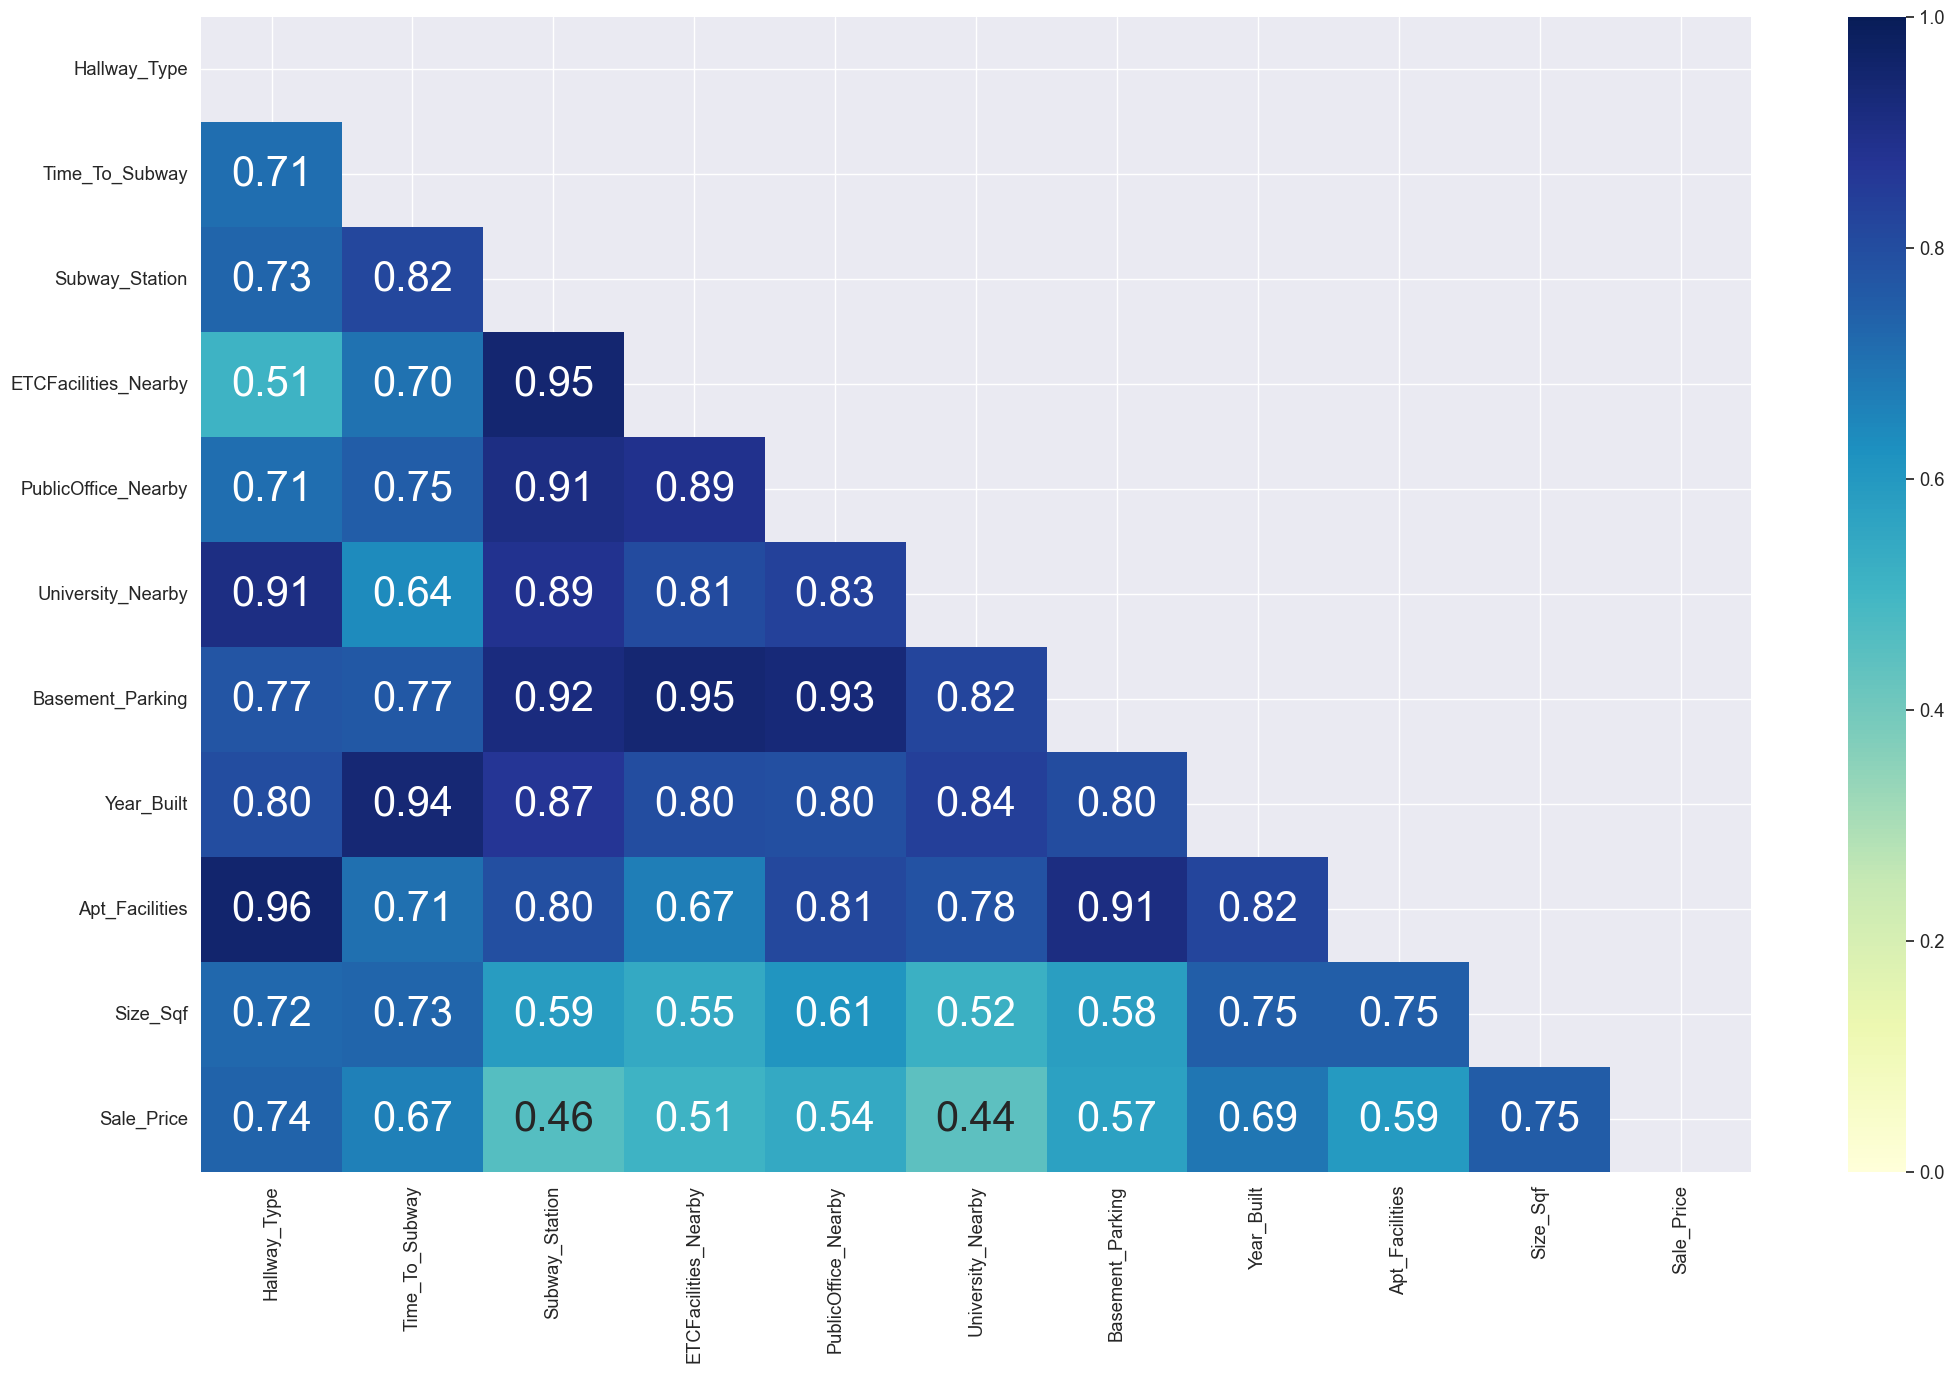

interval columns not set, guessing: ['ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Year_Built', 'Apt_Facilities', 'Size_Sqf', 'Sale_Price']


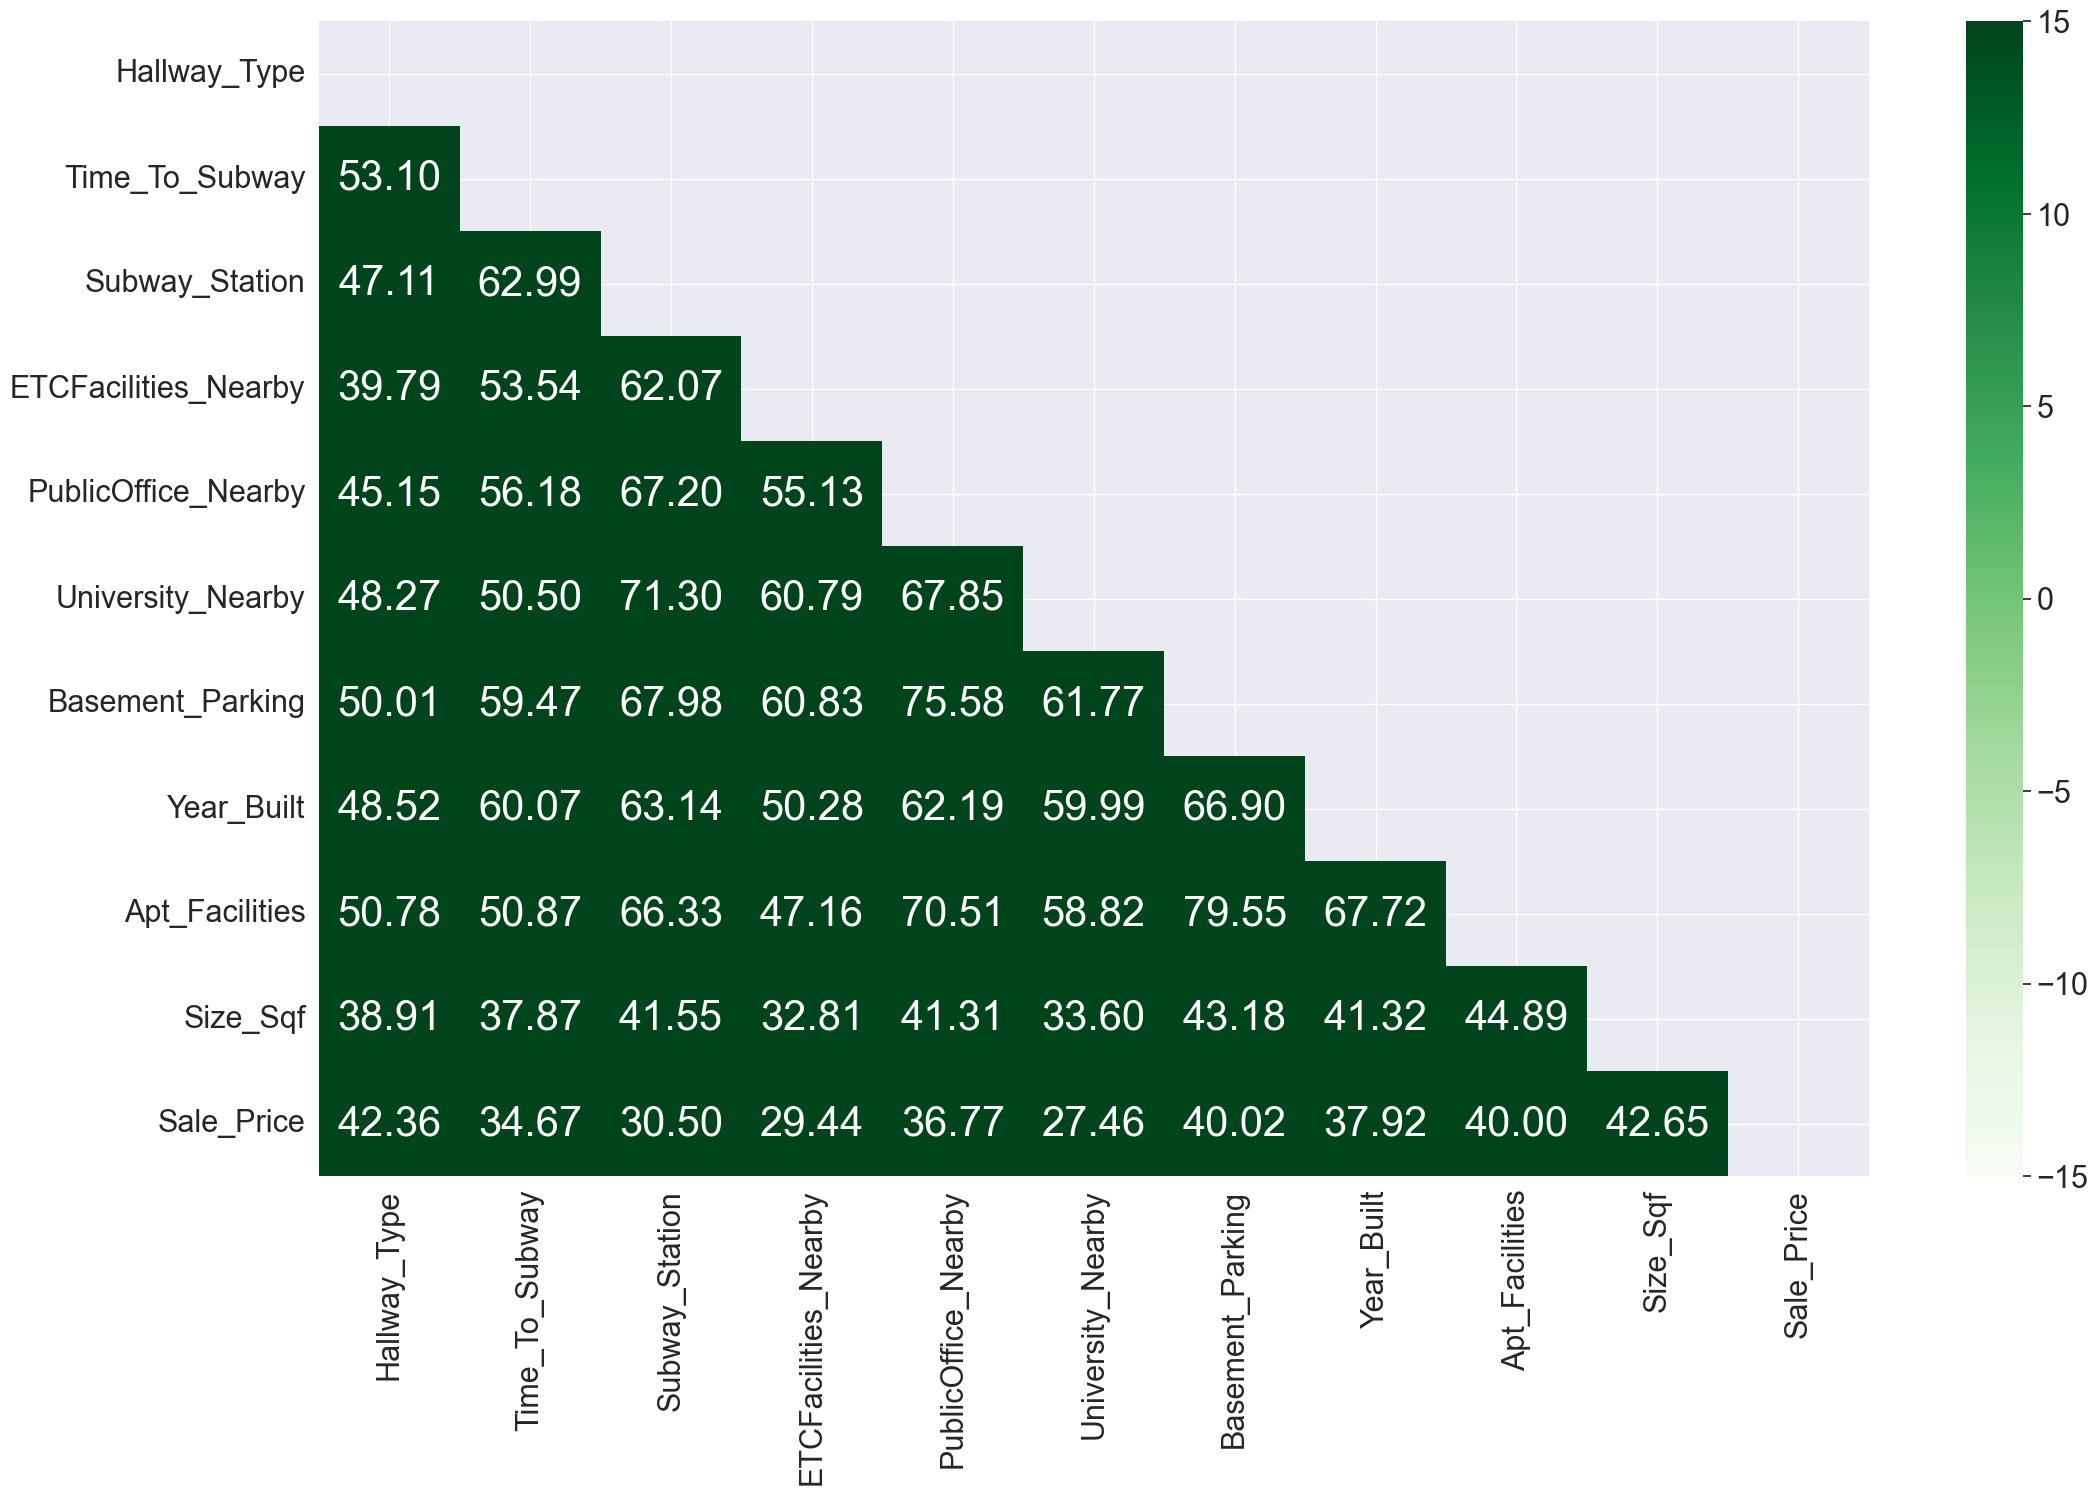

In [204]:
# Check the correlation and signification

# separating the column that we need beetween customer category, product amount and place
dfCorrMap = df[['Hallway_Type', 'Time_To_Subway', 'Subway_Station', 'ETCFacilities_Nearby', 'PublicOffice_Nearby', 'University_Nearby', 'Basement_Parking', 'Year_Built', 'Apt_Facilities', 'Size_Sqf', 'Sale_Price']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(25, 15))
phik_overview = dfCorrMap.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(25, 15))
significance_overview = dfCorrMap.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

Pada correlation dan signification matrix diatas menunjukkan bahwa semua fitur memiliki korelasi tinggi yaitu **Hallway_Type, Time_To_Subway, Subway_Station, ETCFacilities_Nearby, PublicOffice_Nearby, University_Nearby, Basement_Parking, Year_Built, Apt_Facilities, Size_Sqf, Sale_Price**. Dimana korelasinya adalah korelasi positif. Ini berarti Tipe Apartment, Waktu yang dibutuhkan ke stasiun subway terdekat, Nama stasiun subway terdekat, Jumlah fasilitas terdekat, Jumlah fasilitas kantor publik terdekat, Jumlah universitas terdekat, Jumlah tempat parkir, Jumlah fasilitas di apartemen, Ukuran apartemen pengaruh yang cukup besar terhadap harga jual apartemen tersebut.

### **Cek dan Handling Data Rare Label dari Data Categorical**

Selanjutnya setelah dilakukan data cleaning kita akan melanjutkan dengan pengecekan rare label data categorical. Jika memungkinkan kita akan melakukan handling terhadap data tersebut agar pemodelan menjadi lebih akurat.

#### **Check Rare Label pada kolom Hallway_Type**

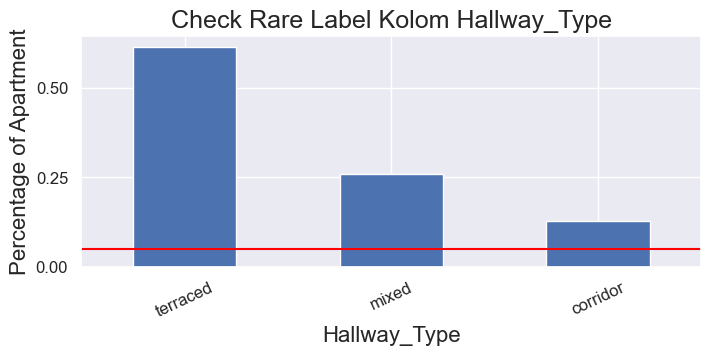

In [205]:
# Melakukan pengecekan rare label pada kolom Hallway_Type

temp_df = pd.Series(df['Hallway_Type'].value_counts() / len(df))

plt.figure(figsize=(8, 3))
plt.title('Check Rare Label Kolom Hallway_Type', fontsize=18)
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('')


fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage of Apartment', fontsize = 16)
fig.set_xlabel('Hallway_Type', fontsize = 16)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

Pada data Hallway_Type tidak terdapat data rare label (percentage data dibawah 5 %), oleh karena itu tidak perlu dilakukan handling data pada kolom berikut.

#### **Check Rare Label pada kolom Time_To_Subway**

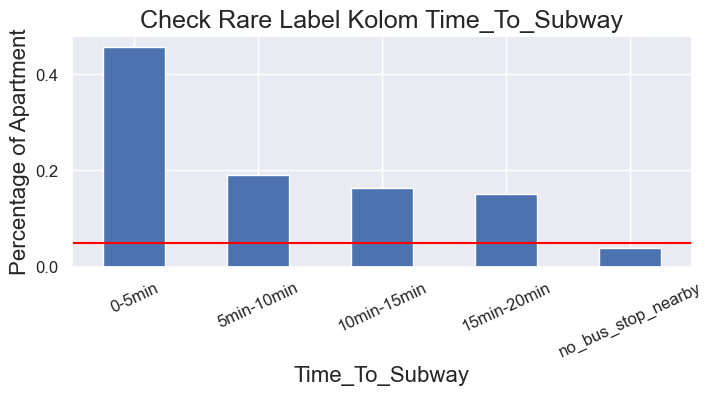

In [206]:
# Melakukan pengecekan rare label pada kolom Time_To_Subway

temp_df = pd.Series(df['Time_To_Subway'].value_counts() / len(df))

plt.figure(figsize=(8, 3))
plt.title('Check Rare Label Kolom Time_To_Subway', fontsize=18)
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('')


fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage of Apartment', fontsize = 16)
fig.set_xlabel('Time_To_Subway', fontsize = 16)
plt.xticks(rotation=25, fontsize=12)
plt.yticks(fontsize=12) 
plt.show()

Pada kolom Time_To_Subway untuk nilai percentage yang kurang dari 0,05 % dari data adalah no_bus_stop_nearby, karena pada data ini memang tidak terdapat Station Subway terdekat dari apartment untuk data tersebut kita akan memakai default untuk informasi pada kolom tersebut.

#### **Check Rare Label pada kolom Subway_Station**

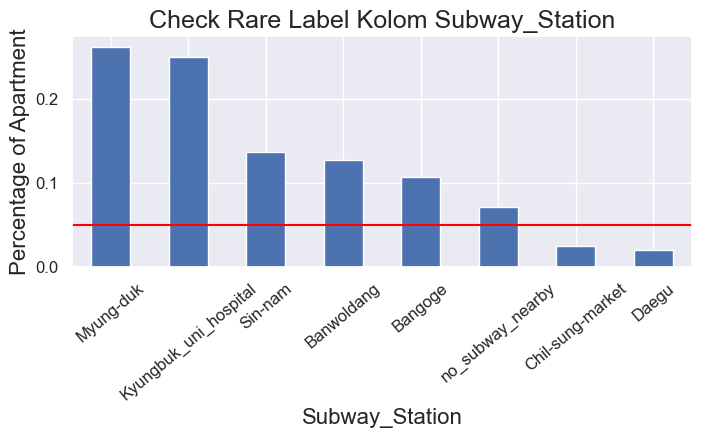

In [207]:
# Melakukan pengecekan rare label pada kolom Subway_Station

temp_df = pd.Series(df['Subway_Station'].value_counts() / len(df))

plt.figure(figsize=(8, 3))
plt.title('Check Rare Label Kolom Subway_Station', fontsize=18)
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('')


fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage of Apartment', fontsize = 16)
fig.set_xlabel('Subway_Station', fontsize = 16)
plt.xticks(rotation=40, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Pada kolom berikut terdapat dua variabel Subway_Station yang bernilai percentage dibawah 5 % yaitu **Chil-sung-market** dan **Daegu** pada kedua data ini kita akan mengubah menjadi satu kategori data yaitu **"others"** agar model yang dilatih pada data tersebut akan cenderung menjadi bias terhadap kelas mayoritas. 

In [208]:
df_model = df.copy()

In [209]:
# Menghitung jumlah setiap kategori
Subway_Counts = df_model['Subway_Station'].value_counts()

# Menghitung persentase setiap kategori
Subway_Percent= Subway_Counts / len(df)

# Membuat kolom baru dengan persentase kategori
df_model['Subway_Percentage'] = df['Subway_Station'].map(Subway_Percent)

In [210]:
df_model.reset_index(inplace=True)

In [211]:
# mengganti value Subway_Station

for i in range (len(df_model)):
    if df_model.Subway_Percentage[i] < 0.05:
        df_model.Subway_Station[i] = 'others'
    else:
        continue


In [212]:
# Check value kolom Subway_Station

df_model['Subway_Station'].value_counts()

Myung-duk                685
Kyungbuk_uni_hospital    655
Sin-nam                  357
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
others                   119
Name: Subway_Station, dtype: int64

Sudah berhasil dalam menyatukan data **Chil-sung-market** dan **Daegu** kedalam variabel data baru yaitu others.

#### **Melakukan Data Splitting**

Membagi data latih dan data uji dengan proporsi 80:20 berarti membagi data menjadi dua bagian, 80% untuk data training dan 20% untuk data test. Data training digunakan untuk melatih model, sedangkan data test digunakan untuk mengevaluasi kinerja model yang telah dilatih. Proporsi 80:20 juga merupakan standar yang umum digunakan dalam proses machine learning.

In [213]:
df_model

,index,Hallway_Type,Time_To_Subway,Subway_Station,ETCFacilities_Nearby,PublicOffice_Nearby,University_Nearby,Basement_Parking,Year_Built,Apt_Facilities,Size_Sqf,Sale_Price,Subway_Percentage
0,0,mixed,15min-20min,others,1,7,3,56,1997,5,558,61946,0.024838
1,1,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504,0.136416
2,2,mixed,15min-20min,others,1,7,3,56,1997,5,558,118584,0.024838
3,3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,572,143362,0.106993
4,4,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,172566,0.071838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2696,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008,0.136416
2613,2697,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477,0.261750
2614,2698,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141,0.261750
2615,2699,corridor,5min-10min,others,2,5,0,76,1985,3,676,73451,0.020634


In [214]:
## Memisahkan Data Variabel Independen dari target

x = df_model.drop(['Sale_Price'], axis=1)
y = df_model['Sale_Price']

# Membagi training dan test data dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,  
    test_size=0.20,
    random_state=99)

#### **Encoding Kolom Categorical**

Encoding adalah proses mengubah data dari satu bentuk ke bentuk lain, biasanya dari format teks menjadi representasi angka. Ini umumnya dilakukan dalam konteks pemrosesan data dan pembelajaran mesin, karena banyak algoritma pemodelan mesin hanya dapat bekerja dengan data numerik. Terdapat tiga kolom dengan data categorical yang perlu dilakukan encoding antara lain:
* Hallway_Type : Mengunakan encoding dengan tipe One-Hot Encoding karena terdapat 3 kategori (memiliki sedikit kategori data, kurang dari 5 kategori)
* Subway_Station : Mengunakan encoding dengan tipe Binary Encoding karena terdapat 8 kategori (memiliki banyak kategori data, lebih dari 5 kategori)
* Time_To_Subway : Mengunakan encoding dengan tipe Ordinal Encoding karena bedasar kelompok waktunya akan diurutkan dari yang terendah (jauh dari subway) ke yang tertinggi (dekat dari subway).

In [215]:
# Mengecek nilai unik dari fitur TimeToSubway

df_model['Time_To_Subway'].value_counts()

0-5min                1196
5min-10min             501
10min-15min            426
15min-20min            394
no_bus_stop_nearby     100
Name: Time_To_Subway, dtype: int64

In [216]:
df_model

,index,Hallway_Type,Time_To_Subway,Subway_Station,ETCFacilities_Nearby,PublicOffice_Nearby,University_Nearby,Basement_Parking,Year_Built,Apt_Facilities,Size_Sqf,Sale_Price,Subway_Percentage
0,0,mixed,15min-20min,others,1,7,3,56,1997,5,558,61946,0.024838
1,1,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504,0.136416
2,2,mixed,15min-20min,others,1,7,3,56,1997,5,558,118584,0.024838
3,3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,572,143362,0.106993
4,4,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,172566,0.071838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,2696,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008,0.136416
2613,2697,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1451,242477,0.261750
2614,2698,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141,0.261750
2615,2699,corridor,5min-10min,others,2,5,0,76,1985,3,676,73451,0.020634


In [217]:
# Convert fitur kategorikal ke numerikal

ordinal_mapping = [
    {'col':'Time_To_Subway',
     'mapping':{'no_bus_stop_nearby':0, '15min-20min':1, '10min-15min':2, '5min-10min':3, '0-5min':4 }}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['Time_To_Subway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
                                ('one_hot_encoder', OneHotEncoder(drop='first'), ['Hallway_Type']),
                                ('binary_encoder', ce.BinaryEncoder(), ['Subway_Station']),
                                ('ordinal_encoder', ce.OrdinalEncoder(), ['Time_To_Subway'])
], remainder='passthrough')

## **`4. Modeling`**

#### **Choose a Benchmark Model**

Setelah dilakukannya dataset yang telah dibagi kedalam kelompok data training dan data testing, sekarang kita akan memilih benchmark model yang akan digunakan sebagai model referensi model sebagai dasar perbandingan kinerja model yang dipilih untuk dikembangkan pada proses selanjutnya.

#### **Model Dasar Untuk Benchmark Model**

Beberapa model regresi yang akan digunakan dalam pemilihan benchmark model antara lain sebagai berikut :
* Linear Regression: Model statistik yang digunakan untuk memodelkan hubungan linear antara variabel independen (fitur) dan variabel dependen (target). 
* Lasso Regression : Model dalam machine learning yang merupakan variasi dari Linear Regression. Tujuan utama dari Lasso Regression adalah untuk mengurangi overfitting dan melakukan seleksi fitur (feature selection) dengan cara memberikan bobot nol pada beberapa fitur yang dianggap tidak relevan.
* Ridge Regression: Model regresi linear yang digunakan untuk mengurangi overfitting dengan menambahkan jumlah kuadrat dari koefisien sebagai regularisasi pada persamaan regresi linier.
* KNN Regression: Model regresi berbasis algoritma K-Nearest Neighbors (KNN) dengan mencari K tetangga terdekat dari data input yang ingin diprediksi dan kemudian melakukan prediksi variabel target numerik.
* Decision Tree Regression: Model regresi memprediksi nilai kontinu (numerik) berdasarkan fitur-fitur yang diberikan. Decision Tree Regression menggunakan struktur pohon keputusan (decision tree) untuk memecah data menjadi beberapa bagian yang lebih kecil dan homogen, dan setiap bagian akan diberi prediksi berdasarkan nilai rata-rata dari target pada bagian tersebut.
* Random Forest Regression: Model regresi yang membangun beberapa decision tree secara acak dengan menggunakan subset data training yang berbeda-beda dan subset fitur yang acak dari dataset yang tersedia dan setiap decision tree dihasilkan dengan menggunakan teknik bootstrap sampling dan feature bagging.
* XGBoost (Extreme Gradient Boosting) Regression: Model regresi yang memanfaatkan teknik gradient boosting dengan pendekatan ensemble learning.

K-fold cross validation juga digunakan sebagai metode evaluasi performa model yang dilakukan dengan membagi dataset menjadi 5 partisi yang sama besar lalu model akan dilatih pada 4 partisi dan diuji pada partisi yang tersisa. Prosedur ini akan dilakukan sebanyak 5 kali dengan partisi yang berbeda-beda sebagai data validasi dan data training sehingga akhirnya performa model akan dihitung berdasarkan rata-rata performa. Metode ini berguna untuk menghindari overfitting atau underfitting dan untuk mendapatkan generalisasi model yang lebih baik.


In [218]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=100)
rf = RandomForestRegressor(random_state=100)
xgb = XGBRegressor(random_state=100)
rd = Ridge(random_state=100)
las = Lasso(random_state=100)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_rd = TransformedTargetRegressor(rd, func=np.log, inverse_func=np.exp)
log_las = TransformedTargetRegressor(las, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_rd, log_las]

def calculate_adjusted_r2(r2, n, p):
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    return adj_r2

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []
adjusted_r_squared = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

training_times = []

# Mencari algoritma terbaik berdasarkan nilai metric evaluation
for i in models:
    start_time = time.time()

    crossval = KFold(n_splits=5, shuffle=True, random_state=100)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

   # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise')
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # Calculate Adjusted R-squared
    n = len(y_train)  # Number of samples in the training set
    p = x_train.shape[1]  # Number of features in the training set
    adj_r2 = calculate_adjusted_r2(model_cv_r2.mean(), n, p)
    adjusted_r_squared.append(adj_r2)

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    end_time = time.time()  # End time for training
    training_time = end_time - start_time
    training_times.append(training_time)

[0.71185142 0.71321389 0.69992611 0.71691756 0.73091532] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-51076.89645438 -54127.01054751 -55462.40729296 -52978.28562643
 -55793.41894213] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-40437.67342984 -43729.18523113 -43676.94490055 -43434.43814248
 -45483.87332144] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.21036733 -0.21697971 -0.22535764 -0.21829981 -0.2153819 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.7621559  0.73841787 0.72826905 0.75211832 0.78832953] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegresso

[-35453.68780394 -40718.71654138 -40722.92278703 -39165.79397395
 -38687.12832505] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.18865479 -0.20460682 -0.21117721 -0.21051106 -0.18807642] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[0.60977399 0.64432471 0.61074335 0.57252501 0.6346903 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=100))
[-59439.39283101 -60278.41649936 -63168.80093183 -65102.36878254
 -65008.34165391] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=100))
[-44057.35560859 -45400.75417661 -47999.70883055 -48876.21291866
 -49494.96411483] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_f

In [304]:
# Evaluasi hasil dari 7 kandidat algoritma yang digunakan
data_standalone = pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'Random Forest Regressor', 'XGBoost Regressor', 'Ridge', 'Lasso'],
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2,
    'Mean_Adjusted_R2': adjusted_r_squared,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Validation_Time' : training_times
})

sorted_data = data_standalone.sort_values(by='Mean_RMSE', ascending=False)
sorted_data


,Model,Mean_R2,Std_R2,Mean_Adjusted_R2,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Validation_Time
1,KNN Regressor,0.753858,0.020753,0.752438,-49987.262203,2189.002246,-38949.649886,1929.325288,-0.200605,0.010254,2.922827
4,XGBoost Regressor,0.746293,0.013821,0.744829,-50772.598081,1321.250570,-39757.254136,1283.767272,-0.201905,0.005973,10.001927
3,Random Forest Regressor,0.741941,0.013426,0.740452,-51216.110596,1533.192856,-39592.629240,1684.627072,-0.202859,0.009076,45.100877
5,Ridge,0.714582,0.009831,0.712936,-53885.932867,1712.318340,-43358.877623,1629.375290,-0.217295,0.004783,1.271828
0,Linear Regression,0.714565,0.009963,0.712918,-53887.603773,1726.058418,-43352.423005,1630.511347,-0.217277,0.004853,2.762269
2,DecisionTree Regressor,0.614411,0.024882,0.612187,-62599.464140,2356.466836,-47165.799130,2089.197696,-0.241714,0.009814,2.221051
6,Lasso,-0.067290,0.028292,-0.073447,-104304.214084,5491.289682,-83782.053160,4978.679825,-0.505391,0.019450,1.348422


- Berdasarkan rata-rata score **Mean_RMSE, Mean_MAE dan Mean_MAPE** dan mempertimbangkan optimasi pemilihan model sesuai dengan limitasi problem yang sudah dijelaskan sebelumnya, kita akan mencoba melakukan tuning dan dilakukan prediksi pada test set pada dua model standalone terbaik, yaitu **KNN** dan **Ridge**. Namun jika improvement yang didapat masih dirasa kurang selanjutnya akan dilakukan tuning dan dilakukan prediksi pada test set model bebasis ensemble terbaik yaitu **XGBoost**

### **Score Before Tuning**

Sebelum menjalankan proses tuning pada model machine learning, penting untuk menentukan baseline score atau performa awal model. Baseline score adalah performa model sebelum ada perubahan apapun, yang nantinya akan dijadikan sebagai referensi awal dan menjadi evaluasi performa tuning setelah dibandingkan dengan hasil matriks dan kinerja model setelah dilakukan parameter tuning.

In [220]:
from xgboost import XGBRegressor

models = {
    'KNN': KNeighborsRegressor(),
    'Ridge': Ridge(random_state=100),
    'XGBoost': XGBRegressor(random_state=100)  # Add XGBoost model
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []
score_adj_r2 = []

# Prediksi pada test set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = model.score(x_test, y_test)

    n = len(y_test)
    p = x_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    score_r2.append(r2)
    score_adj_r2.append(adj_r2)
    score_rmse.append(rmse)
    score_mae.append(mae)
    score_mape.append(mape)

score_before_tuning = pd.DataFrame({
    'R-squared': score_r2,
    'Adjusted R-squared': score_adj_r2,
    'RMSE': score_rmse,
    'MAE': score_mae,
    'MAPE': score_mape
}, index=models.keys())

score_before_tuning


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
KNN,0.776511,0.771262,50033.925425,39457.543893,0.198427
Ridge,0.781122,0.775982,49515.062198,40086.287828,0.204492
XGBoost,0.771865,0.766507,50551.302893,39335.443918,0.201980


Ketika dilakukan prediksi pada test set, performa model **Ridge** lebih baik pada bagian nilai R-Squared dan RMSE dibandingkan dengan model KNN dan XGBoost. Sementara model **KNN dan XGBoost** mempunyai data lebih baik pada nilai MAE dan MAPE yang lebih rendah dari model Ridge.

## **Hyperparameter Tuning**

Pada hasil test sebelumnya dari tiga model menunjukan bahwa model Ridge mempunyai performa yang lebih baik pada R-Squared dan RMSE, sedangkan pada KNN dan XGBoost mempunyai performa yang lebih baik pada MAE dan MAP dibandingkan dengan Ridge.Selanjutnya, kita akan lakukan hyperparameter tuning pada ketiga model tersebut untuk melihat perubahan performa mana yang lebih baik setelah dilakukan Hyperparameter Tuning, sehingga nantinya model terbaik hasil tuning tersebut yang akan kita gunakan.

### **Tuning untuk parameter Ridge**

Ridge adalah salah satu algoritma regularisasi yang digunakan dalam machine learning untuk mengatasi masalah overfitting (berlebihan) pada model. Algoritma ini dikenal juga dengan istilah "Ridge Regression" atau "L2 Regularization." Ridge bekerja dengan menambahkan istilah regularisasi berdasarkan L2-norm dari koefisien model ke dalam fungsi tujuan (objective function) yang ingin dioptimalkan selama proses pelatihan.
Tujuan utama dari Ridge adalah untuk mencegah koefisien model yang besar sehingga mengurangi kompleksitas model dan mengurangi peluang overfitting. Hal ini terutama berguna ketika kita memiliki banyak fitur (features) dalam data pelatihan yang dapat menyebabkan estimasi koefisien yang tidak stabil.

Saat melakukan tuning hyperparameter untuk model Ridge, ada satu parameter utama yang perlu diatur:

1. Alpha (α) atau Lambda (λ): Ini adalah parameter regularisasi yang mengontrol seberapa kuat efek dari regularisasi terhadap model. Nilai alpha yang lebih besar akan menghasilkan penalti yang lebih besar terhadap koefisien model, sehingga membuat model lebih umum dan mencegah overfitting. Nilai alpha yang terlalu kecil mungkin tidak memberikan efek yang signifikan terhadap regularisasi. Nilai optimal alpha dipilih melalui validasi silang (cross-validation) untuk menemukan keseimbangan antara underfitting dan overfitting.
2. fit_intercept: Ini adalah parameter boolean yang menentukan apakah model Ridge harus memiliki intercept (bias) atau tidak. Jika diatur ke True, model akan memiliki intercept, dan jika diatur ke False, model tidak akan memiliki intercept.
3. normalize: Parameter ini juga boolean dan menentukan apakah fitur-fitur dalam data akan dinormalisasi sebelum dilatih. Normalisasi dapat membantu ketika skala fitur sangat berbeda-beda.
4. solver: Parameter ini mengatur algoritma yang digunakan untuk menghitung koefisien model. Beberapa pilihan umum termasuk "auto", "svd", "cholesky", "lsqr", dan "sparse_cg". Algoritma yang dipilih dapat mempengaruhi kecepatan dan performa pelatihan.
5. max_iter: Ini adalah jumlah iterasi maksimum yang akan dilakukan oleh solver untuk konvergensi. Jika solver belum konvergen sebelum mencapai jumlah iterasi maksimum, pelatihan akan dihentikan.

In [221]:
# Menentukan hyperparameter space untuk model Ridge

alpha = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]  # Regularization strength (L2 penalty)

param_distributions = {
    'model__alpha': alpha,
    'model__fit_intercept': [True, False],   # Fit intercept atau tidak
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],   # Solver untuk masalah optimasi
    'model__max_iter': [100, 500, 1000],   # Jumlah maksimum iterasi
    'model__tol': [1e-3, 1e-4, 1e-5],   # Toleransi kesalahan
}

ridge = Ridge()

In [222]:
# Membuat Ridge model dan estimator pipeline

estimator_ridge = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', ridge)
])

In [223]:
# Melakukan proses hyperparameter tuning dengan RandomizedSearchCV

random_ridge = RandomizedSearchCV(
    estimator_ridge,
    param_distributions=param_distributions,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=100
)

random_ridge.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Hallway_Type']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['Subway_Station']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['Time_To_Subway'])])),
                                             ('s...
                   param_distributions={'model__alpha': [0.001, 0.01, 0.1, 1.0,
                                                         10.0, 100.0],
                                        'model__fit_intercept': [True, False],
                                        'model__max_iter': [100, 500, 1000],
                                        'model__solver': ['auto', 'svd',
                                                          'cholesky', 'lsqr',
                                                          'sag'],
                                        'model__tol': [0.001, 0.0001, 1e-05]},
                   random_state=100, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error', 'r2'])

In [224]:

result_df = pd.DataFrame(random_ridge.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

In [225]:
# MEnghitung R-squared dan adjusted R-squared untuk setiap parameter combination

score_r2 = []
score_adj_r2 = []

for params in result_df['params']:
    estimator_ridge.set_params(**params)
    estimator_ridge.fit(x_train, y_train)
    y_pred = estimator_ridge.predict(x_test)
    r2 = estimator_ridge.score(x_test, y_test)
    n = len(y_test)
    p = x_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    score_r2.append(r2)
    score_adj_r2.append(adj_r2)

result_df['R-squared'] = score_r2
result_df['Adjusted R-squared'] = score_adj_r2

# Menampilkan kolom yang relevan.
columns_to_display = ['mean_test_neg_root_mean_squared_error', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_mean_absolute_percentage_error', 'mean_test_r2', 'R-squared', 'Adjusted R-squared', 'param_model__alpha']
result_df = result_df[columns_to_display]

# Menampilkan DataFrame yang diurutkan
result_df

,mean_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error,mean_test_r2,R-squared,Adjusted R-squared,param_model__alpha
20,-51021.010000,-41907.779241,-0.220170,0.743948,0.781155,0.776016,0.001
36,-51021.042534,-41911.607598,-0.220218,0.743947,0.781136,0.775996,1.0
40,-51021.208197,-41908.270569,-0.220169,0.743946,0.781140,0.776000,0.01
47,-51021.374088,-41908.598664,-0.220172,0.743944,0.781138,0.775999,0.1
48,-51021.376648,-41908.598043,-0.220172,0.743944,0.781139,0.775999,0.1


In [226]:
# Cek skor dan params terbaik
print('Ridge')
print('Best_score:', random_ridge.best_score_)
print('Best_params:', random_ridge.best_params_)

Ridge
Best_score: -51021.01000027035
Best_params: {'model__tol': 0.0001, 'model__solver': 'lsqr', 'model__max_iter': 500, 'model__fit_intercept': True, 'model__alpha': 0.001}


**Predict to Test Set with the Tuned Model After Tuning (Ridge)**

Membuat prediksi pada test set menggunakan model Ridge dan hyperparameter yang dipilih. Proses prediksi pada Test Set setelah melakukan tuning hyperparameter bertujuan untuk mengukur performa model yang telah dioptimalkan dan memastikan bahwa model tersebut memiliki kinerja yang baik pada data yang belum pernah dilihat sebelumnya. Dengan demikian, kita dapat memperoleh keyakinan bahwa model dapat digunakan untuk melakukan prediksi pada situasi dunia nyata dan beragam data baru.

In [227]:
# Model Ridge
models_ridge = {
    'Ridge': Ridge(random_state=100)
}

# Define model terhadap estimator terbaik
ridge_tuning = random_ridge.best_estimator_

#Fitting model
ridge_tuning.fit(x_train, y_train)

# Predict test set
y_pred_ridge_tuning = ridge_tuning.predict(x_test)

# Calculate RMSE, MAE, and MAPE
rmse_ridge_tuning = mean_squared_error(y_test, y_pred_ridge_tuning, squared=False)
mae_ridge_tuning = mean_absolute_error(y_test, y_pred_ridge_tuning)
mape_ridge_tuning = mean_absolute_percentage_error(y_test, y_pred_ridge_tuning)  # You need to define this function

# Menghitung R-squared dan adjusted R-squared untuk tuned model
r2_ridge_tuning = r2_score(y_test, y_pred_ridge_tuning)
n = len(y_test)
p = x_test.shape[1]
adj_r2_ridge_tuning = 1 - ((1 - r2_ridge_tuning) * (n - 1) / (n - p - 1))

# Simpan nilai metrics RMSE, MAE, MAPE, R-squared, dan adjusted R-squared setelah tuning
score_after_tuning_ridge = pd.DataFrame({
    'R-squared': r2_ridge_tuning, 
    'Adjusted R-squared': adj_r2_ridge_tuning,
    'RMSE': rmse_ridge_tuning, 
    'MAE': mae_ridge_tuning, 
    'MAPE': mape_ridge_tuning}, index=models_ridge.keys())

# Tampilkan data before Tuning
print('BEFORE TUNING:')
display(pd.DataFrame(score_before_tuning.loc['Ridge']).T)


# Tampilkan data after Tuning
print('AFTER TUNING:')
score_after_tuning_ridge


BEFORE TUNING:


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
Ridge,0.781122,0.775982,49515.062198,40086.287828,0.204492


AFTER TUNING:


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
Ridge,0.781155,0.776016,49511.32421,40081.900241,0.204412


Compare performansi hasil model tidak berbeda jauh, peningkatan yang dihasilkan pada setiap martiks R-Squared, RMSE, MAE dan MAPE **tidak terjadi secara signifikan**, sehingga kesimpulannya adalah hasil hyperparameter tuning pada model Ridge pada case ini tidaklah efektif. Selanjutnya kita lanjutkan untuk melakukan Hyperparameter tuning pada model selanjutnya. Apakah terdapat peningkatan signifikan pada Hyperparameter Tuning pada model yang lain.

### **Tuning untuk parameter KNN**

Model KNN (K-Nearest Neighbors) adalah salah satu algoritma sederhana dalam machine learning untuk klasifikasi dan regresi. Algoritma KNN sering digunakan dalam masalah pengenalan pola dan pengelompokan data. Konsep dasar dari KNN adalah mencari sejumlah tetangga terdekat (nearest neighbors) dari suatu titik data yang baru, dan memprediksi label atau nilai targetnya berdasarkan mayoritas label tetangga terdekatnya. Algoritma KNN cenderung lebih baik dalam kasus data yang tidak terlalu kompleks atau dengan jumlah fitur yang sedikit. Namun, perlu diingat bahwa KNN adalah algoritma lazy learning, yang berarti model tidak melakukan proses pelatihan yang kompleks. Sebaliknya, saat diberikan data baru, algoritma KNN akan menghitung tetangga terdekatnya pada saat itu juga. Oleh karena itu, KNN cenderung memiliki kinerja yang lebih baik pada dataset yang relatif kecil. Namun, KNN juga memiliki beberapa kelemahan, seperti kinerjanya yang lambat pada dataset besar karena harus menghitung jarak dengan semua titik data pelatihan, serta kebutuhan untuk menentukan nilai K secara tepat untuk mendapatkan hasil yang baik.

Berikut adalah beberapa parameter penting yang harus diperhatikan:
1. Nilai K (jumlah tetangga terdekat): Parameter K menentukan jumlah tetangga terdekat yang akan digunakan untuk melakukan mayoritas voting dalam proses klasifikasi. Nilai K yang tepat harus dipilih agar tidak terlalu menggeneralisasi (overfitting) atau terlalu tergeneralisasi (underfitting) pada data pelatihan. Biasanya, K dipilih sebagai bilangan ganjil untuk menghindari hasil mayoritas yang sama.
2. Bobot jarak (optional): Dalam beberapa kasus, kita dapat memberikan bobot pada jarak antara tetangga dan data yang baru. Bobot jarak dapat memberikan pengaruh lebih besar pada tetangga yang lebih dekat atau sebaliknya, tergantung pada preferensi dan karakteristik data.
3. Algoritma pencarian tetangga terdekat: Saat melakukan prediksi pada data baru, algoritma KNN perlu mencari tetangga terdekatnya dalam ruang fitur. Terdapat berbagai algoritma yang bisa digunakan untuk meningkatkan efisiensi pencarian, seperti KD-trees, Ball-trees, dan brute-force search.
4. Leave-size (ukuran leave) : sering disebut "holdout set size" mengacu pada seberapa besar proporsi dataset yang dipisahkan sebagai data uji atau validasi saat menggunakan metode validasi silang (cross-validation) dalam model KNN. 



In [228]:
# Fungsi mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data preprocessing dan pembagian data
# ... (Isi bagian ini dengan data preprocessing dan pembagian data Anda)

# Hyperparameter KNN
n_neighbors = list(range(1, 21))  # Jumlah tetangga (neighbors)
weights = ['uniform', 'distance']  # Menentukan bobot yang digunakan dalam prediksi
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritma pencarian tetangga terdekat
leaf_size = list(range(10, 51, 5))  # Ukuran daun pohon untuk algoritma BallTree atau KDTree

# Hyperparam space KNN
hyperparam_space_knn = {
    'model__n_neighbors': n_neighbors,
    'model__weights': weights,
    'model__algorithm': algorithm,
    'model__leaf_size': leaf_size   
}


In [229]:
# Benchmark model dengan hyperparameter tuning
knn = KNeighborsRegressor()

# Membuat algorithm chains
estimator_knn = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', knn)
])

# Hyperparameter tuning KNN
random_knn = RandomizedSearchCV(
    estimator_knn,
    param_distributions=hyperparam_space_knn,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',  # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state=1
)

In [230]:
# Fitting data training untuk mencari parameter terbaik
random_knn.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Hallway_Type']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['Subway_Station']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['Time_To_Subway'])])),
                                             ('s...
                   param_distributions={'model__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                                        'model__leaf_size': [10, 15, 20, 25, 30,
                                                             35, 40, 45, 50],
                                        'model__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [231]:
# Cek skor dan params terbaik untuk KNN
print('K-Nearest Neighbors (KNN)')
print('Best_score:', random_knn.best_score_)
print('Best_params:', random_knn.best_params_)

K-Nearest Neighbors (KNN)
Best_score: -49485.40166626587
Best_params: {'model__weights': 'uniform', 'model__n_neighbors': 8, 'model__leaf_size': 30, 'model__algorithm': 'kd_tree'}


**Predict to Test Set with the Tuned Model After Tuning (K-Nearest Neighbors)**

Membuat prediksi pada test set menggunakan model K-Nearest Neighbors dan hyperparameter yang dipilih. Kita melakukan test set digunakan untuk menguji model yang sudah dilatih dan memberikan gambaran tentang seberapa baik model tersebut akan berkinerja pada data yang belum pernah dilihat sebelumnya.

In [232]:
# Model KNN
model_knn = {'KNN': KNeighborsRegressor()}

# Define model terhadap estimator terbaik KNN
knn_tuning = random_knn.best_estimator_

# Fitting model KNN
# knn_tuning.fit(x_train, y_train)

# Predict test set menggunakan model KNN
y_pred_knn_tuning = knn_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE, MAPE, R-squared, dan adjusted R-squared setelah tuning untuk model KNN
rmse_knn_tuning = np.sqrt(mean_squared_error(y_test, y_pred_knn_tuning))
mae_knn_tuning = mean_absolute_error(y_test, y_pred_knn_tuning)
mape_knn_tuning = mean_absolute_percentage_error(y_test, y_pred_knn_tuning)

# Hitung R-squared dan adjusted R-squared
r2_knn_tuning = r2_score(y_test, y_pred_knn_tuning)
n = len(y_test)
p = len(x_test.columns)
adj_r2_knn_tuning = 1 - ((1 - r2_knn_tuning) * (n - 1) / (n - p - 1))
mape_knn_tuning_scaled = mape_knn_tuning / 100

# Simpan nilai metrics RMSE, MAE, MAPE, R-squared, dan adjusted R-squared setelah tuning untuk model KNN
score_after_tuning_knn = pd.DataFrame({
    'R-squared': r2_knn_tuning,
    'Adjusted R-squared': adj_r2_knn_tuning,
    'RMSE': rmse_knn_tuning,
    'MAE': mae_knn_tuning,
    'MAPE': mape_knn_tuning_scaled 
}, index=model_knn.keys())

# Tampilkan data before Tuning
print('BEFORE TUNING:')
display(pd.DataFrame(score_before_tuning.loc['KNN']).T)

# Tampilkan data after Tuning
print('AFTER TUNING:')
display(score_after_tuning_knn)


BEFORE TUNING:


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
KNN,0.776511,0.771262,50033.925425,39457.543893,0.198427


AFTER TUNING:


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
KNN,0.781064,0.775923,49521.564052,39112.346613,0.197193


Setelah dilakukan analisa pada hasil after tuning model KNN dengan before tuning, peningkatan yang dihasilkan pada setiap martiks R-Squared, RMSE, MAE dan MAPE **tidak terjadi secara signifikan**, sehingga kesimpulannya adalah hasil hyperparameter tuning pada model KNN pada case ini juga tidak mengasilkan performa yang efektif. Selanjutnya kita lanjutkan untuk melakukan Hyperparameter tuning pada model XGBoost.

### **Tuning untuk parameter XGBoost**

XGBoost (Extreme Gradient Boosting) adalah algoritma machine learning yang kuat dan populer untuk tugas-tugas klasifikasi, regresi, dan perangkingan. Algoritma ini berbasis pada Boosting Tree, di mana serangkaian pohon keputusan digabungkan untuk meningkatkan kinerja model. XGBoost menggunakan pendekatan peningkatan gradient, di mana setiap pohon berusaha untuk memperbaiki kesalahan prediksi pohon sebelumnya. Algoritma ini juga menyediakan teknik regularisasi untuk mengurangi overfitting dan mengoptimalkan pemisahan yang optimal pada setiap langkah pembangunan pohon. XGBoost dapat digunakan untuk berbagai tujuan seperti klasifikasi biner, klasifikasi multikelas, regresi, dan perangkingan. Keunggulannya terletak pada kecepatan dan efisiensi, serta populer di kompetisi data dan aplikasi dunia nyata. Dengan kemampuan yang kuat dan kinerja yang unggul, XGBoost telah menjadi salah satu algoritma machine learning yang sangat sukses dan seringkali menjadi pilihan utama dalam proyek-proyek machine learning yang menuntut performa tinggi.

Berikut adalah beberapa parameter penting yang harus diperhatikan:

1. learning_rate: Parameter ini adalah learning rate atau tingkat pembelajaran model. Learning rate mengontrol seberapa besar kontribusi setiap pohon pada model. Nilai yang lebih kecil membuat model lebih konservatif dan mengurangi risiko overfitting, sedangkan nilai yang lebih besar membuat model lebih agresif dalam pembelajaran dan dapat menyebabkan overfitting.
2. max_depth: Parameter ini menentukan kedalaman maksimum setiap pohon dalam model. Kedalaman pohon mempengaruhi tingkat kompleksitas model dan berpotensi mempengaruhi risiko overfitting atau underfitting. Nilai yang lebih kecil membuat model lebih sederhana dan mengurangi risiko overfitting, sedangkan nilai yang lebih besar dapat meningkatkan kapasitas model.
3. n_estimators: Parameter ini menentukan jumlah pohon (estimator) yang akan digunakan dalam model. Jumlah pohon yang lebih besar bisa meningkatkan kinerja tetapi juga meningkatkan waktu pelatihan.
4. gamma: Parameter ini adalah nilai minimum penurunan kerugian yang diperlukan untuk melanjutkan pembelajaran pada suatu cabang (split) dalam pohon. Nilai yang lebih besar membuat model lebih konservatif dan membatasi pertumbuhan pohon, yang dapat mengurangi overfitting. Nilai 0 menandakan tidak ada batas minimum untuk membuat split baru.
5. subsample: Parameter ini adalah fraksi sampel yang digunakan dalam setiap iterasi untuk membangun pohon. Nilai kurang dari 1.0 mengurangi overfitting dengan mengatur sebagian data acak dalam setiap pohon.
6. colsample_bytree: Parameter ini adalah fraksi fitur yang digunakan dalam setiap iterasi untuk membangun pohon. Nilai kurang dari 1.0 mengurangi kompleksitas model dengan mengatur sebagian fitur acak dalam setiap pohon.

Pengaturan parameter-parameter ini dapat dipilih melalui proses tuning hyperparameter dengan menggunakan metode validasi silang (cross-validation) untuk mendapatkan kombinasi parameter yang memberikan hasil yang optimal pada dataset yang diberikan.


In [233]:
# Fungsi mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Data preprocessing dan pembagian data
# ... (Isi bagian ini dengan data preprocessing dan pembagian data Anda)

# Hyperparameter XGBoost
learning_rate = [0.01, 0.1, 0.2, 0.3]  # Learning rate
max_depth = [3, 5, 7, 9]  # Maksimum kedalaman pohon
n_estimators = [50, 100, 200, 300]  # Jumlah estimators (pohon) yang digunakan
gamma = [0, 0.1, 0.2, 0.3]  # Minimum loss reduction untuk membuat split baru dalam tree
subsample = [0.6, 0.7, 0.8, 0.9, 1.0]  # Fraksi sampel yang digunakan dalam setiap tree
colsample_bytree = [0.6, 0.7, 0.8, 0.9, 1.0]  # Fraksi fitur yang digunakan dalam setiap tree

# Hyperparam space XGBoost
hyperparam_space_xgboost = {
    'model__learning_rate': learning_rate,
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__gamma': gamma,
    'model__subsample': subsample,
    'model__colsample_bytree': colsample_bytree
}

In [234]:
# Model XGBoost
xgboost = XGBRegressor(random_state=100)

estimator_xgboost = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', xgboost)
])

In [235]:
random_xgboost = RandomizedSearchCV(
    estimator_xgboost,
    param_distributions=hyperparam_space_xgboost,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=1
)

random_xgboost.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Hallway_Type']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['Subway_Station']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['Time_To_Subway'])])),
                                             ('s...
                                                                    0.8, 0.9,
                                                                    1.0],
                                        'model__gamma': [0, 0.1, 0.2, 0.3],
                                        'model__learning_rate': [0.01, 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [3, 5, 7, 9],
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__subsample': [0.6, 0.7, 0.8, 0.9,
                                                             1.0]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [236]:
print('XGBoost')
print('Best_score:', random_xgboost.best_score_)
print('Best_params:', random_xgboost.best_params_)

XGBoost
Best_score: -45946.91764875727
Best_params: {'model__subsample': 0.9, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__gamma': 0.2, 'model__colsample_bytree': 0.6}


**Predict to Test Set with the Tuned Model After Tuning (XGBoost)**

Membuat prediksi pada test set menggunakan model XGBoost dan hyperparameter yang dipilih.

In [237]:
# Fitting model
xgboost_tuning = random_xgboost.best_estimator_
# xgboost_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgboost_tuning = xgboost_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE, dan MAPE setelah tuning
rmse_xgboost_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgboost_tuning))
mae_xgboost_tuning = mean_absolute_error(y_test, y_pred_xgboost_tuning)
mape_xgboost_tuning = mean_absolute_percentage_error(y_test, y_pred_xgboost_tuning)

# Hitung R-squared dan adjusted R-squared
r2_xgboost_tuning = r2_score(y_test, y_pred_xgboost_tuning)
n = len(y_test)
p = len(x_test.columns)
adj_r2_xgboost_tuning = 1 - ((1 - r2_xgboost_tuning) * (n - 1) / (n - p - 1))
mape_xgboost_tuning_scaled = mape_xgboost_tuning / 100

# Simpan hasil dalam DataFrame
score_after_tuning_xgboost = pd.DataFrame({
    'R-squared': r2_xgboost_tuning,
    'Adjusted R-squared': adj_r2_xgboost_tuning,
    'RMSE': rmse_xgboost_tuning,
    'MAE': mae_xgboost_tuning,
    'MAPE': mape_xgboost_tuning_scaled  # Gunakan nilai MAPE yang telah diubah ke skala 0 hingga 1
}, index=['XGBoost'])

# Tampilkan data before Tuning
print('BEFORE TUNING:')
display(pd.DataFrame(score_before_tuning.loc['XGBoost']).T)

print('AFTER TUNING:')
display(score_after_tuning_xgboost)

BEFORE TUNING:


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
XGBoost,0.771865,0.766507,50551.302893,39335.443918,0.20198


AFTER TUNING:


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
XGBoost,0.818233,0.813964,45122.573696,36019.151501,0.19069


Compare performansi hasil Test Set pada XGBoost terdapat peningkatan yang lebih baik dibandingkan Model sebelumnya yaitu Rigde dan KNN, peningkatan yang dihasilkan pada setiap martiks R-Squared, RMSE, MAE dan MAPE **terjadi secara signifikan**, sehingga kesimpulannya adalah hasil hyperparameter tuning pada model XGBoost pada case ini adalah efektif. Sehingga dapat kesimpulan akhir bahwa model yang menghasilkan performance paling baik setelah dilakukan hyperparameter tuning adalah model XGBoost, dan dapat diimplemetasikan secara efektif pada prediction harga sewa Daegu Apartment ini.

### **Prediction Result dan Komparasi Model setelah Tuning**

Setelah dilakukan hyperparameter tuning dan test set didapat hasil komparasi setiap model sebagai berikut :

In [238]:
display(score_after_tuning_ridge, score_after_tuning_knn, score_after_tuning_xgboost)

,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
Ridge,0.781155,0.776016,49511.32421,40081.900241,0.204412


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
KNN,0.781064,0.775923,49521.564052,39112.346613,0.197193


,R-squared,Adjusted R-squared,RMSE,MAE,MAPE
XGBoost,0.818233,0.813964,45122.573696,36019.151501,0.19069


Summary perbandingan yang didapatkan dari ketiga hasil parameter tuning adalah sebegai berikut :

* Hasil yang didapatkan bahwa **R-Square** pada Model XGBoost lebih baik dibandingkan pada model Ridge dan KNN, dengan nilai paling besar **0.818233**. Nilai R-Squared yang semakin dekat nilai R-squared ke 1, maka semakin baik model tersebut dalam menjelaskan variabilitas data.
* Hasil yang didapatkan bahwa **Adjusted R-Squared** pada Model XGBoost lebih baik dibandingkan pada model Ridge dan KNN, dengan nilai paling besar **0.813964**. Semakin tinggi nilai Adjusted R-squared, semakin baik model dalam mempertimbangkan kompleksitas dan jumlah fitur yang digunakan.
* Hasil yang didapat bahwa **RMSE** pada Model XGBoost lebih baik dibandingkan pada model Ridge dan KNN, dengan nilai RMSE paling kecil **45122.573696**. Model dengan RMSE yang lebih rendah lebih baik dalam memprediksi nilai target dengan lebih akurat.
* Hasil yang didapat bahwa **MAE** pada Model XGBoost lebih baik dibandingkan pada model Ridge dan KNN, dengan nilai MAE paling kecil **36019.151501**. Semakin rendah nilai MAE (mendekati 0), semakin baik model dalam memprediksi nilai target dengan akurat. 
* Hasil yang didapat bahwa **MAPE** pada Model XGBoost lebih baik dibandingkan pada model Ridge dan KNN, dengan nilai MAPE paling kecil **0.19069**. Semakin rendah nilai MAPE, semakin baik model dalam memprediksi nilai target dengan akurat dalam bentuk persentase kesalahan, dengan nilai dibawah 20 % bisa dianggap sangat baik, terutama jika model tersebut merupakan hasil dari usaha peningkatan dan tuning yang cermat.

### **`Cara Kerja Model XGBoost`**

XGBoost adalah implementasi sumber terbuka yang populer dan efisien dari algoritma pohon yang ditingkatkan gradien. Peningkatan gradien adalah algoritma pembelajaran yang diawasi, yang mencoba memprediksi variabel target secara akurat dengan menggabungkan perkiraan serangkaian model yang lebih sederhana dan lebih lemah. Saat menggunakan peningkatan gradien untuk regresi, peserta didik yang lemah adalah pohon regresi, dan setiap pohon regresi memetakan titik data masukan ke salah satu daunnya yang berisi skor berkelanjutan. XGBoost meminimalkan fungsi obyektif yang diatur (L1 dan L2) yang menggabungkan fungsi kehilangan cembung (berdasarkan perbedaan antara output yang diprediksi dan target) dan istilah penalti untuk kompleksitas model (dengan kata lain, fungsi pohon regresi). Pelatihan berlangsung berulang, menambahkan pohon baru yang memprediksi residu atau kesalahan pohon sebelumnya yang kemudian digabungkan dengan pohon sebelumnya untuk membuat prediksi akhir. Ini disebut peningkatan gradien karena menggunakan algoritma turunan gradien untuk meminimalkan kerugian saat menambahkan model baru.

Di bawah ini adalah ilustrasi singkat tentang bagaimana gradient tree boosting bekerja.

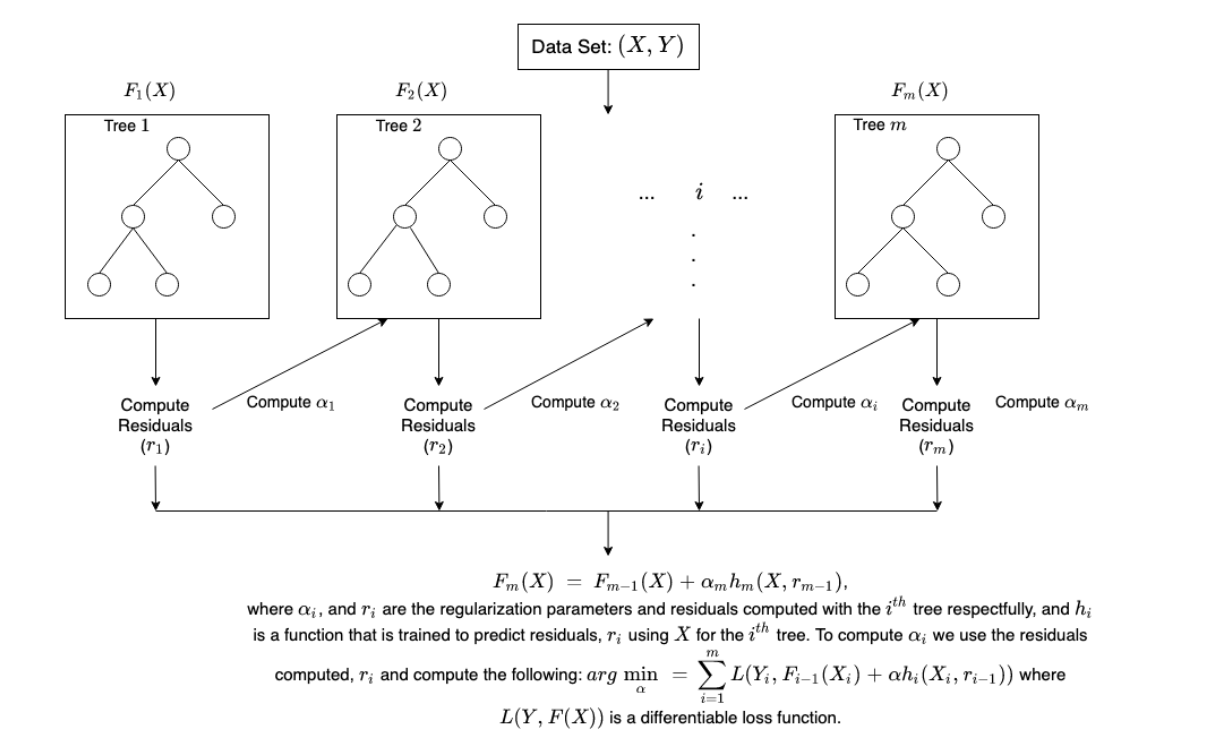

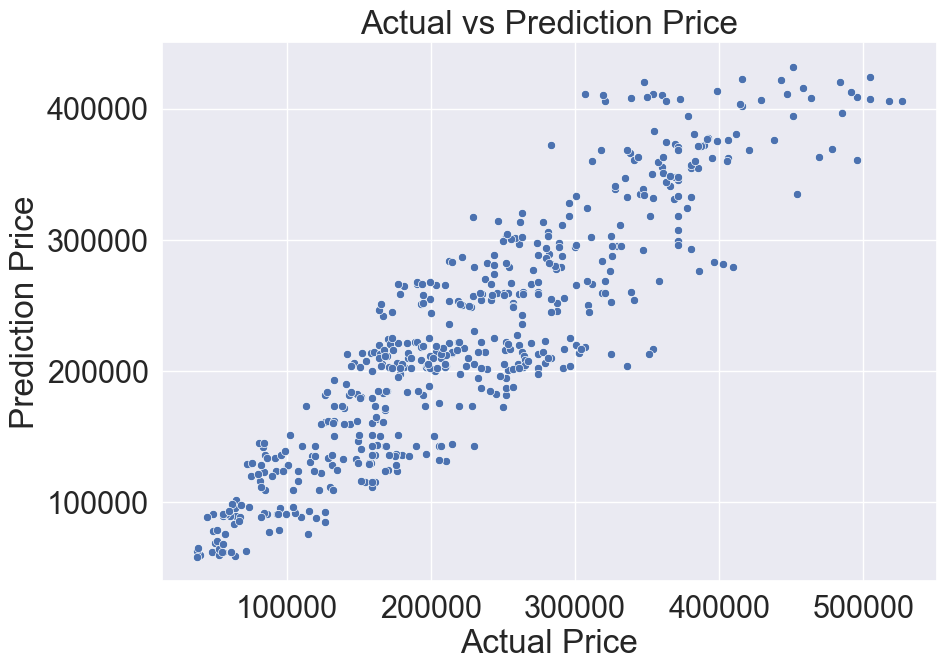

In [239]:
plt.figure(figsize=(10, 7))
plot = sns.scatterplot(x=y_test, y=y_pred_xgboost_tuning).set(title = 'Actual vs Prediction Price',
                                              xlabel = 'Actual Price',
                                              ylabel = 'Prediction Price')

Terdapatnya nilai-nilai error yang membuat perbedaan yang cukup signifikan antara nilau RMSE dan MAE. Hal ini dapat terlihat pada grafik scatter plot diatas, dimana terdapat harga aktual yang tinggi akan tetapi di prediksikan lebih rendah (underestimation) ataupun sebaliknya (overestimation). Namun, jika dilihat dari nilai MAPE yaitu 19.069% menjadikan model masuk kedalam kategori "good forecasting" (Lewis, 1982)

In [240]:
# Residual = y_actual - y_prediksi
residual = y_test-y_pred_xgboost_tuning

df_residual = pd.DataFrame({
    'y_pred': y_pred_xgboost_tuning,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
1545,295490.531250,33712.468750
731,222344.593750,-3760.593750
1,360632.781250,-49128.781250
1170,214309.953125,-10770.953125
2324,129275.640625,-55435.640625


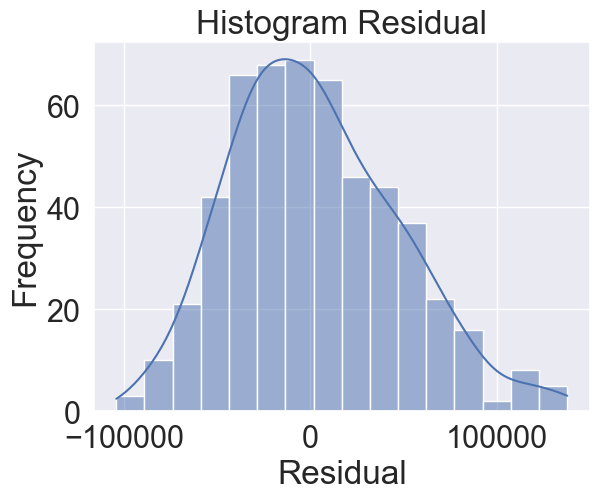

In [241]:
# Plot histogram residual
sns.histplot(df_residual['residual'], kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram Residual')
plt.show()

In [242]:
# Uji normalitas dengan uji Shapiro-Wilk
statistic, p_value = shapiro(df_residual['residual'])

print('Shapiro-Wilk Test')
print('Statistic:', statistic)
print('P-Value:', p_value)

# Interpretasi hasil uji Shapiro-Wilk
alpha = 0.05
if p_value > alpha:
    print("Residual berdistribusi normal (tidak ada bukti untuk menolak H0)")
else:
    print("Residual tidak berdistribusi normal (tolak H0)")

Shapiro-Wilk Test
Statistic: 0.9842255115509033
P-Value: 1.8774322597892024e-05
Residual tidak berdistribusi normal (tolak H0)


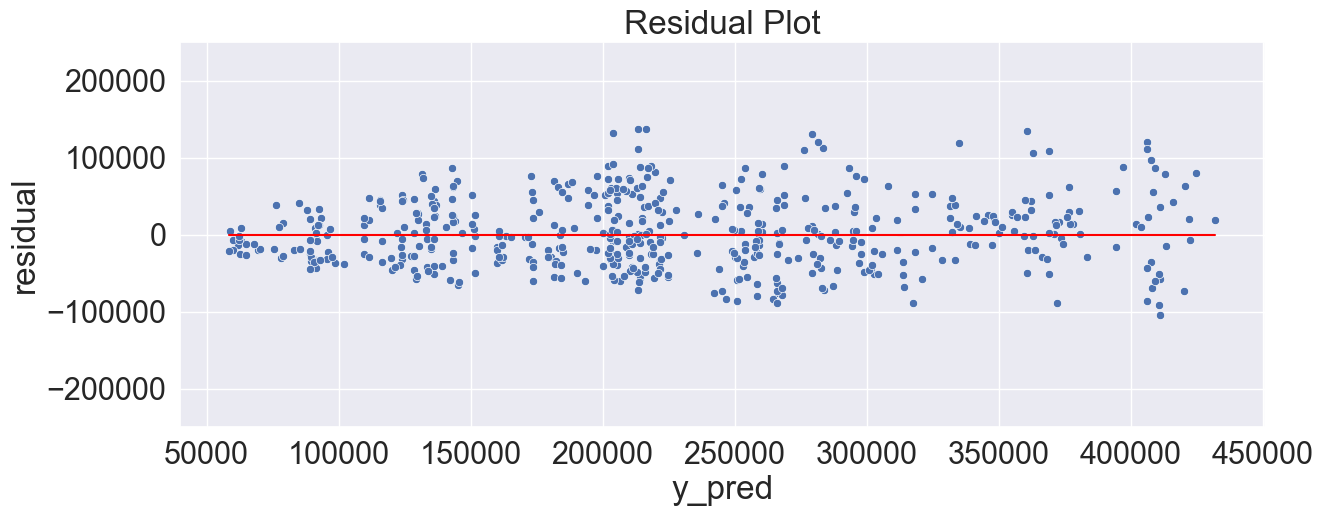

In [243]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red')
plt.title('Residual Plot')
plt.ylim(-250000, 250000)
plt.show()



###  **`Model Explanation`**

Model explanation merujuk pada usaha untuk memahami dan menjelaskan bagaimana suatu model machine learning membuat keputusan atau prediksi berdasarkan data input. Model explanation sangat penting karena banyak model machine learning modern, di bawah ini adalah beberapa konsep dan metode terkait model explanation dalam konteks modeling:

### **Feature Importances**

In [244]:
import pandas as pd

# Diasumsikan transformer dan scaler sudah didefinisikan sebelumnya
# Diasumsikan x_train, y_train, x_test, dan y_test sudah didefinisikan sebelumnya

# Fit dan transformasikan transformer pada data latih (x_train)
x_train_transformed = transformer.fit_transform(x_train)

# Dapatkan nama-nama fitur yang telah ditransformasi
feature_names = transformer.get_feature_names_out(input_features=x_train.columns)

# Dapatkan nilai penting fitur dari model xgboost_tuning
feature_importances = pd.Series(xgboost_tuning['model'].feature_importances_, feature_names).sort_values(ascending=False)

# Buat DataFrame dengan nilai penting fitur
feature_imp_df = feature_importances.to_frame(name='Nilai Penting Fitur')

# Tampilkan DataFrame
print(feature_imp_df)


                                        Nilai Penting Fitur
one_hot_encoder__Hallway_Type_terraced             0.539232
remainder__Year_Built                              0.075915
remainder__Apt_Facilities                          0.071503
remainder__Basement_Parking                        0.066869
remainder__Size_Sqf                                0.061876
remainder__ETCFacilities_Nearby                    0.051099
ordinal_encoder__Time_To_Subway                    0.034993
one_hot_encoder__Hallway_Type_mixed                0.029729
remainder__PublicOffice_Nearby                     0.023261
remainder__University_Nearby                       0.021932
binary_encoder__Subway_Station_2                   0.010593
remainder__Subway_Percentage                       0.004895
remainder__index                                   0.003892
binary_encoder__Subway_Station_0                   0.002490
binary_encoder__Subway_Station_1                   0.001721


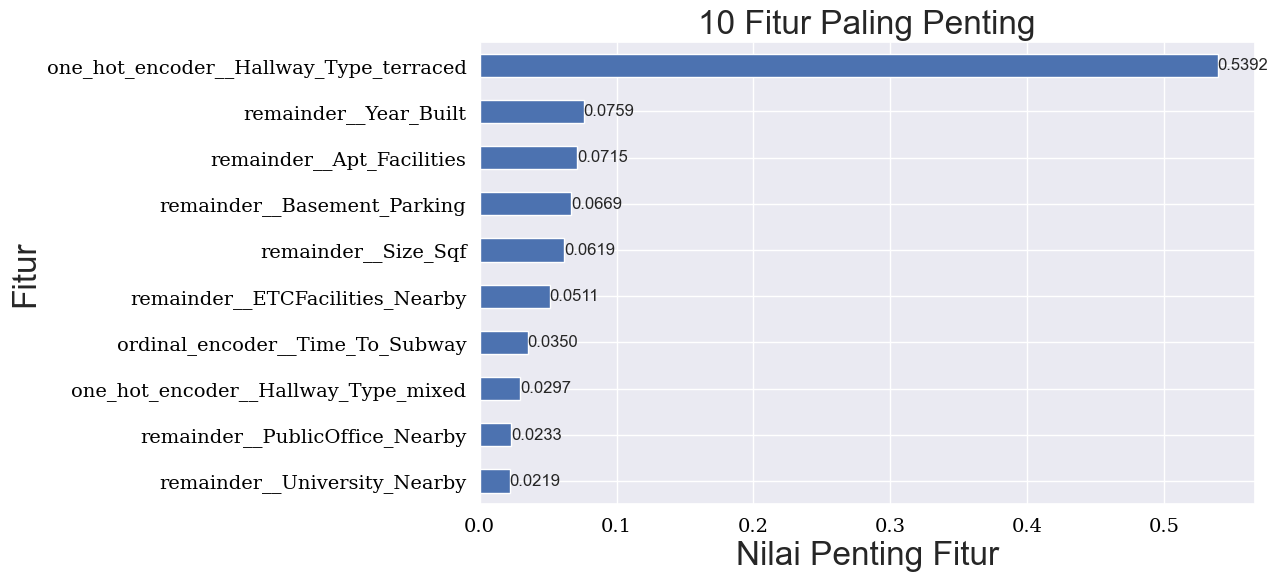

In [245]:
import matplotlib.pyplot as plt

# Anggap feature_importances telah dihitung sebelumnya

# Plot nilai penting fitur dalam bentuk diagram batang horizontal
plt.figure(figsize=(10, 6))
ax = feature_importances.head(10).sort_values().plot(kind='barh')
plt.xlabel('Nilai Penting Fitur')
plt.ylabel('Fitur')
plt.title('10 Fitur Paling Penting')

# Tambahkan nilai numerik di dalam setiap batang dengan ukuran font lebih kecil
for index, value in enumerate(feature_importances.head(10).sort_values()):
    ax.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=12)

# Atur font untuk keterangan sumbu X dan Y
font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 14}
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font)
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font)

plt.show()

Berdasarkan tingkat kepentingan fitur terhadap model, feature yang paling berpengaruh terhadap harga apartment di Daegu adalah tipe apartment terraced, Year_Built (tahun pembuatan), dan Basement_Parking (jumlah tempat parkir basement). Dengan menggunakan model final XGBoost dan data feature yang berpengaruh, dapat membantu agen property dalam menentukan harga sewa apartment yang tepat di kota Daegu, Korea Selatan. Diharapkan pemanfaatan model berikut dapat meningkatkan tingkat kesuksesan untuk memasarkan dalam menyewakan unit apartment.





In [246]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Hallway_Type', 'Time_To_Subway', 'Subway_Station']:
    le = LabelEncoder()
    x_train[column] = le.fit_transform(x_train[column])
    label_encoders[column] = le

In [247]:
from xgboost import DMatrix

dtrain = DMatrix(data=x_train, label=y_train, enable_categorical=True)


### **SHAP (Shapey Value of Explanations)**

In [248]:
import shap
import pandas as pd  # Make sure pandas is imported
from sklearn.model_selection import train_test_split  # Import train_test_split if not imported
from xgboost import XGBRegressor
import xgboost as xgb

In [249]:
import xgboost as xgb

regressor = xgb.XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [250]:
# Create an object that can calculate SHAP values
explainer = shap.TreeExplainer(regressor)

# Calculate SHAP values
shap_values = explainer.shap_values(x_train)

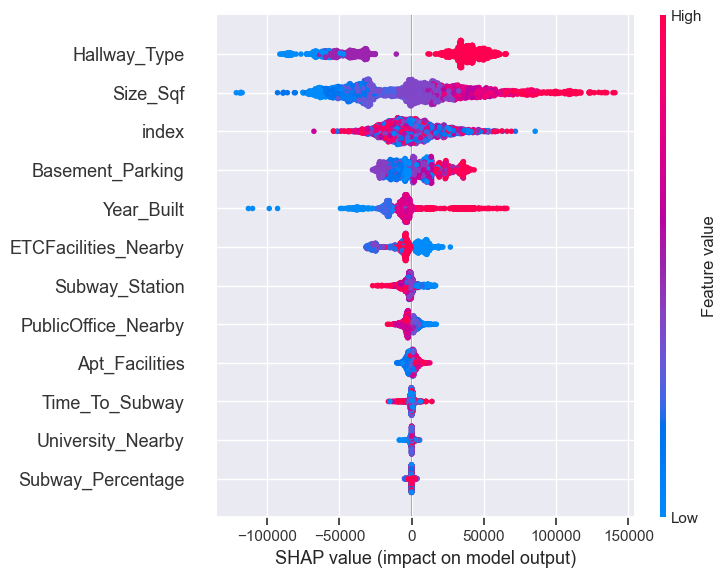

In [251]:
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns)

In [253]:
import shap
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0], x_test.iloc[0], feature_names=x_train.columns)


Didapatkan sebuah insight pada diagrap SHAP berikut bahwa didapatkan nilai SHAP yang didapat dari penjumlahan masing-masing fitur sebesar 177,593.08, dan fitur-fitur pada batang biru mendukung lebih banyak dampak dalam memprediksi target menjadi 0, dapat dilihat pada grafik batang biru dari kontribusinya, dibandingkan dengan grafik batang merah.

### **Model Limitation**

Model limitation mengacu pada batasan-batasan atau keterbatasan yang dimiliki oleh model yang digunakan dalam proses pembelajaran mesin. Setiap model memiliki keterbatasan tertentu yang dapat memengaruhi kinerja dan kemampuan model tersebut. Perlunya membuat model limitation untuk suatu model untuk memahami keterbatasan model membantu Anda memiliki pandangan yang lebih realistis tentang apa yang dapat dicapai oleh model tersebut. Ini membantu menghindari ekspektasi yang tidak realistis dan mengarahkan eksperimen atau pengembangan model ke arah yang lebih produktif.

In [273]:
from sklearn.metrics import mean_absolute_error

# Your code to create the data_y_pred DataFrame and list_ranges

data_y_pred = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_pred_xgboost_tuning})
data_y_pred.reset_index(drop=True, inplace=True)
data_y_pred.sort_values('y_test').head(20)

list_ranges = [
    ("<10000", 0, 10000),
    ("10001-20000", 10001, 20000),
    ("20001-30000", 20001, 30000),
    ("40001-50000", 40001, 50000),
    ("50001-60000", 50001, 60000),
    ("60001-70000", 60001, 70000),
    ("70001-80000", 70001, 80000),
    ("80001-90000", 80001, 90000),
    ("90001-100000", 90001, 100000),
    ("100001-150000", 110001, 120000),
    ("120001-130000", 120001, 130000),
    ("130001-140000", 130001, 140000),
    ("140001-150000", 140001, 150000),
    ("150001-200000", 150001, 200000),
    ("200001-250000", 200001, 250000),
    ("250001-300000", 250001, 300000),
    ("300001-350000", 300001, 350000),
    ("350001-400000", 350001, 400000),
    ("400001-450000", 400001, 450000),
    ("450001-500000", 450001, 500000),
    ("500001-550000", 500001, 550000),
    (">550000", 600001, float('inf')),
    ("All Range (Max 953000)", 0, float('inf'))
]


list_mae = []
list_mape = []
list_len = []

for range_name, min_value, max_value in list_ranges:
    range_data = data_y_pred[(data_y_pred['y_test'] > min_value) & (data_y_pred['y_test'] <= max_value)]

    if len(range_data) > 0:  # Check if there are data points in the current range
        score_mae = mean_absolute_error(range_data['y_test'], range_data['y_test_pred'])
        score_mape = mean_absolute_percentage_error(range_data['y_test'], range_data['y_test_pred'])
        len_data = len(range_data)

        list_mae.append(score_mae)
        list_mape.append(score_mape)
        list_len.append(len_data)
    else:
        list_mae.append(None)  # No data in the range, you can assign a placeholder value or None
        list_mape.append(None)
        list_len.append(0)

range_metrics = pd.DataFrame({
    "Range Count": [range_name for range_name, _, _ in list_ranges],
    "Score MAE": list_mae,
    "Score MAPE (%)": list_mape,
    "Jumlah Data": list_len
})

range_metrics


,Range Count,Score MAE,Score MAPE (%),Jumlah Data
0,<10000,NaN,NaN,0
1,10001-20000,NaN,NaN,0
2,20001-30000,NaN,NaN,0
3,40001-50000,30099.184375,63.581689,5
4,50001-60000,20559.114955,36.930055,14
5,60001-70000,23366.473011,36.425033,11
6,70001-80000,40682.560826,54.377157,7
7,80001-90000,34642.096354,41.398452,15
8,90001-100000,21701.578835,22.714762,11
9,100001-150000,25615.781250,22.297726,9


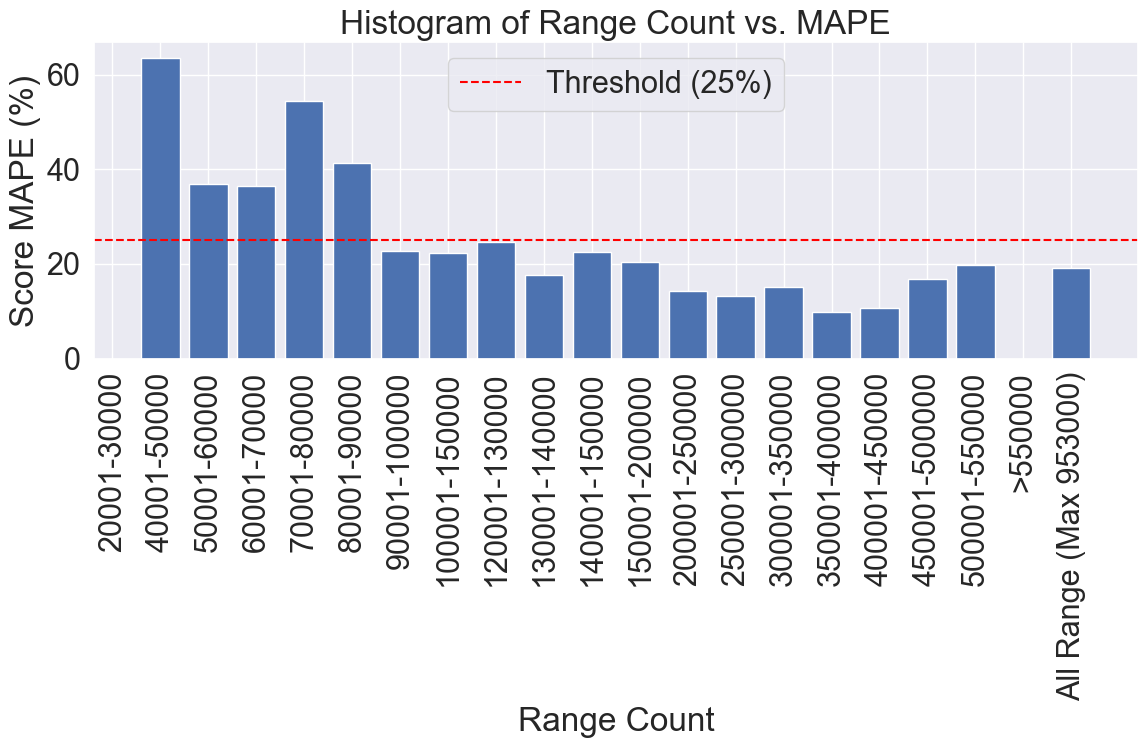

In [269]:
import matplotlib.pyplot as plt

# ... (your previous code)

# Plot histogram
plt.figure(figsize=(12, 8))
plt.bar(range_metrics["Range Count"], range_metrics["Score MAPE (%)"])
plt.xlabel("Range Count")
plt.ylabel("Score MAPE (%)")
plt.title("Histogram of Range Count vs. MAPE")
plt.xticks(rotation=90)

# Add a horizontal line at Y = 25
plt.axhline(y=25, color='red', linestyle='--', label='Threshold (25%)')

plt.tight_layout()
plt.legend()  # Show legend to indicate the threshold line
plt.show()

Berdasar pada grafik diatas yaitu keterkaitan score MAPE dengan harga sewa apartment yang diprediksi, dapat dijelaskan limitasi untuk model berikut yaitu model XGboost pada dataset data_daegu_apartment dapat memprediksi harga dengan range mulai dari **90001 won dan seterusnya sampai dengan diatas 500000**. Dimana pada rentang harga ini nilai MAPE bernilai dibawah 25 % dimana MAPE dibawah nilai tersebut akurasinya masih dapat diterima. seseuai penelitian dari *Swanson, David A* dimana MAPE dibawah nilai tersebut akurasinya masih dapat diterima. (menggunakan threeshold MAPE 25% [**>> Sumber Threshold MAPE**](https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy.)

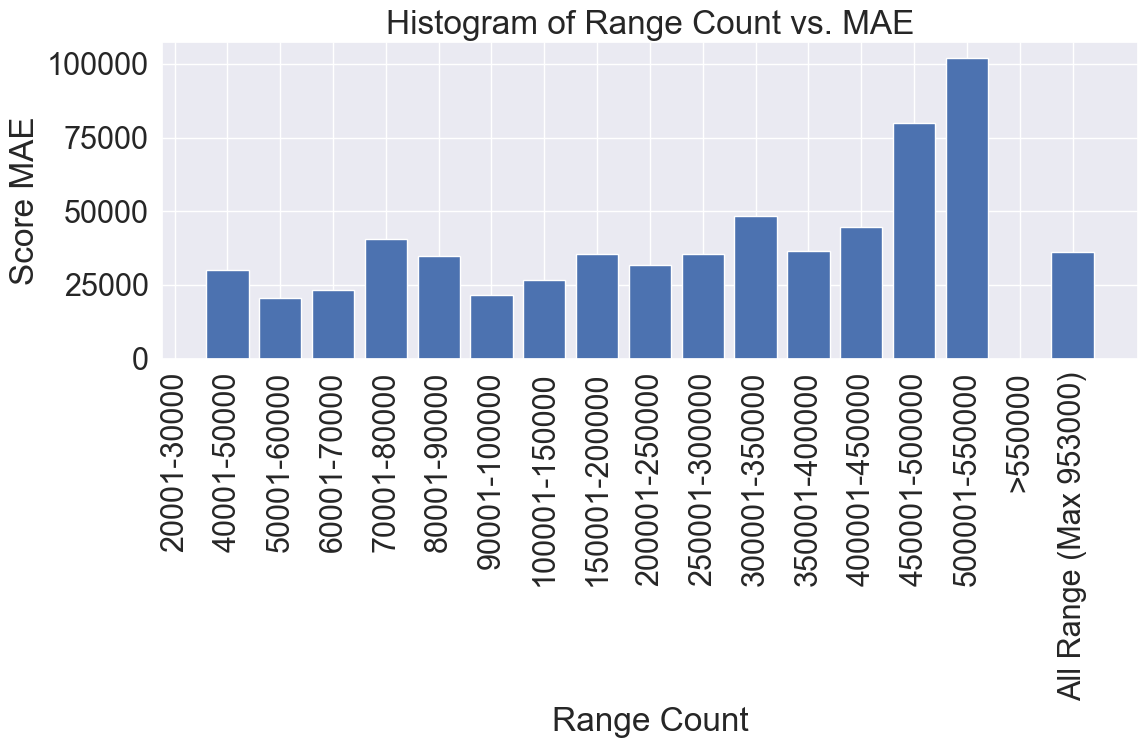

In [257]:
# Plot histogram
plt.figure(figsize=(12, 8))  # Enlarge the graph size
plt.bar(range_metrics["Range Count"], range_metrics["Score MAE"])
plt.xlabel("Range Count")
plt.ylabel("Score MAE")
plt.title("Histogram of Range Count vs. MAE")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Pada grafik diatas dapat diambil insight bahwa pada pemodelan ini semakin tinggi harga yang diprediksi maka nilai rata-rata error absolute cenderung akan naik.

### **Prediksi Tingkat Kesalahan**

Di bawah ini adalah tabel yang menunjukkan kesalahan absolut dan persentase kesalahan absolut, untuk mendapatkan gambaran tentang apa yang bisa diperbaiki.
Sebagai catatan, rumus untuk kesalahan sederhana: measurement - true value.

Ini dibuat absolut karena pasti akan ada angka negatif dan karena kita menghitung jarak antara nilai sebenarnya (true value) dan prediksi (prediction), nilai negatif tidak terlalu penting, hanya bentuk absolut yang penting. 

Rumus persentase pada dasarnya sama dengan rumus kesalahan absolut yang dibuat menjadi persentase. Yang selanjutnya insight dari perhitungan ini akan dijelaskan pada bagian conclusions.

In [274]:
y_test_test = y_test.tolist()

In [275]:
df_result = pd.DataFrame(data=y_test_test, columns=["y_Test"], dtype=None, copy=None)
df_result["Prediction"] = y_pred_xgboost_tuning.tolist()

df_result["Difference"] = abs(df_result["y_Test"]-df_result["Prediction"])
df_result["% of Differences"] = abs(df_result["Difference"]/df_result["y_Test"]*100)
df_result.sort_values("% of Differences",ascending=False).head(30)

,y_Test,Prediction,Difference,% of Differences
367,44247,88998.117188,44751.117188,101.139325
247,48672,91362.742188,42690.742188,87.711091
241,80530,145283.062500,64753.062500,80.408621
259,72256,129275.640625,57019.640625,78.913364
4,73840,129275.640625,55435.640625,75.075353
246,84070,145459.187500,61389.187500,73.021515
522,75920,129873.945312,53953.945312,71.066841
80,83185,142070.546875,58885.546875,70.788660
314,38053,64957.542969,26904.542969,70.702817
191,37610,62595.679688,24985.679688,66.433607


In [276]:
df_result.sort_values("% of Differences",ascending=False).tail(30)

,y_Test,Prediction,Difference,% of Differences
211,207044,210121.156250,3077.156250,1.486233
405,123893,122178.843750,1714.156250,1.383578
153,263716,260208.078125,3507.921875,1.330189
118,202654,200133.625000,2520.375000,1.243684
30,369026,373584.031250,4558.031250,1.235152
23,360176,355936.968750,4239.031250,1.176933
126,336283,332501.062500,3781.937500,1.124629
100,219469,221931.906250,2462.906250,1.122211
87,161504,163292.296875,1788.296875,1.107277
196,150000,151653.140625,1653.140625,1.102094


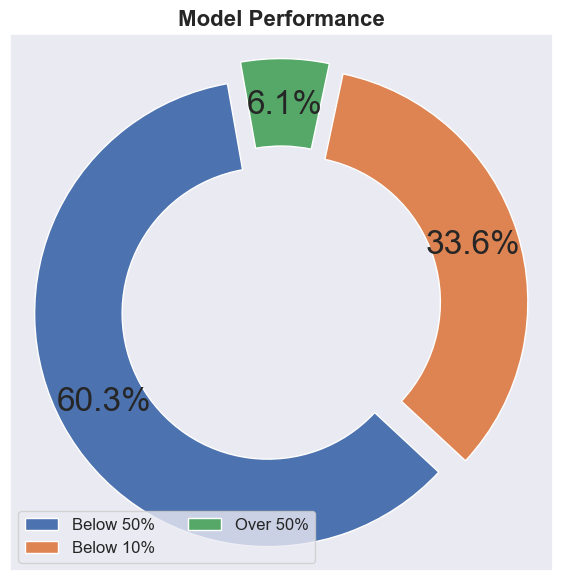

In [278]:
def percent_grouper(x):
    if x <= 10:
        return "Below 10%"
    elif x < 50:
        return "Below 50%"
    else:
        return "Over 50%"

df_result["Error"] = df_result["% of Differences"].apply(percent_grouper)

labels = ["Below 50%", "Below 10%", "Over 50%"]

# Create a pie chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df_result["Error"].value_counts(), 
       radius=0.8, 
       startangle=100, 
       autopct="%.1f%%",
       pctdistance=0.8,
       labeldistance=1.1,
       frame=True,
       explode=(0.05, 0.05, 0.05),
       wedgeprops=dict(width=0.3, edgecolor='w'),
)

# Remove ticks and labels from the pie chart
ax.set_xticks([])
ax.set_yticks([])

# Set the title for the pie chart
plt.title("Model Performance", fontsize=16, fontweight="bold")

# Set the legend for the pie chart with larger fontsize
plt.legend(labels, ncol=2, loc="lower left", frameon=True, prop={"size": 12})

# Display the pie chart
plt.show()


Bagan di atas telah dikelompokkan menjadi tiga kategori:

1. **Prediksi dengan tingkat kesalahan di atas 50% (buruk):** Terlihat bahwa hanya sekitar 6.1% dari prediksi yang termasuk dalam kategori ini. Persentase kesalahan yang relatif rendah ini dapat dimengerti, mengingat bahwa tidak ada model yang benar-benar sempurna.

2. **Prediksi dengan tingkat kesalahan di bawah 50% (baik):** Sekitar 60.3% dari total prediksi masuk ke dalam kategori ini, menunjukkan kinerja yang memadai. Ini menunjukkan bahwa model ini mampu memberikan hasil yang layak, terutama dalam mengantisipasi skenario dengan risiko yang rendah.

3. **Prediksi dengan tingkat kesalahan di bawah 10% (sangat baik):** Sebanyak 33,6% dari hasil prediksi termasuk dalam kategori ini. Ini menunjukkan kemampuan model untuk memberikan hasil yang sangat dekat dengan kenyataan, dan potensinya untuk memberikan prediksi yang sangat akurat.

Dibandingkan dengan pendekatan penetapan harga tradisional, model ini memiliki beberapa keunggulan:
- Menghemat waktu dan usaha dalam penelitian pasar.
- Mengurangi tenaga kerja yang diperlukan untuk riset, hanya memerlukan pengawasan ulang pada prediksi yang tidak biasa.
- Menghemat biaya dan sumber daya.
- Mengurangi tingkat kesalahan yang relatif rendah.

Walaupun model ini memiliki kekurangan dan ruang untuk perbaikan, berdasarkan informasi yang telah disampaikan, model ini memberikan estimasi yang sangat baik tentang kisaran harga rata-rata apartemen di Daegu, bermanfaat bagi penjual dan pembeli apartemen.

Namun, tetap diingat bahwa menentukan harga yang akurat untuk apartemen adalah suatu hal yang sulit. Model ini mampu memberikan gambaran yang baik tentang harga, dan ini adalah alternatif yang efektif dalam situasi yang kompleks ini.

## **`6. Conclusion & Recommendation`**

#### **Conclusion**

Berdasarkan proses pemodelan yang sudah dilakukan didapatkan beberapa kesimpulan sebagai berikut :
1. Model terbaik yang didapatkan pada proses modeling untuk dataset data_daegu_apartment yang dapat digunakan untuk memprediksi harga sewa apartment adalah model **XGBoost**
2. Setelah dilakukan proses Hyperparameter Tuning dan Predict Test Set didapatkan bahwa model **XGBoost** mempunyai performa yang lebih baik pada matriks R-Squared, Adjusted R-Squared, MRSE, MAE dan MAPE dibandingkan pada model **Ridge** dan model **KNN**
3. Berdasarkan pemodelan yang telah dilakukan, terdapat tiga besar fitur yang paling berpengaruh terhadap Sale_Price adalah fitur Hallway_Type (0.539), Year_Built (0.0759), dan Apt_Facilities (0.0715).
4. Berdasarkan model final (model XGBoost), feature yang paling berpengaruh terhadap harga apartment di Daegu adalah tipe apartment terraced, Year_Built (tahun pembuatan), dan  Apt_Facilities (Fasilitas Apartment). Dengan menggunakan model final XGBoost dan data feature yang berpengaruh, dapat membantu agen property dalam menentukan harga sewa apartment yang tepat di kota Daegu, Korea Selatan. Diharapkan pemanfaatan model berikut dapat meningkatkan tingkat kesuksesan untuk memasarkan dalam menyewakan unit apartment.
5. Metrik evaluasi yang digunakan dalam model adalah R-Square, RMSE, MAE & MAPE. Jika melihat nilai MAPE yang dihasilkan oleh model setelah dilakukan tuning hyperparameter, yaitu sebesar 19.069%, maka dapat disimpulkan bahwa jika model ini digunakan untuk mengestimasi harga apartemen di Daegu pada rentang nilai yang telah dilatihkan pada model (harga maksimum 585840 won), maka estimasi rata-rata akan menyimpang kurang lebih sebesar 19.069% dari harga sebenarnya.

MAPE Interpretation I
|MAPE | Rating |
|---|---|
< 10 %	|Very good
10 % - 20 %	|Good
20 % - 50 %|	OK
|> 50 % |	Not good|

* [**Sumber 1 : What is a good MAPE score?**](https://stephenallwright.com/good-mape-score/)

6. Model berikut yaitu model XGboost pada dataset data_daegu_apartment dapat memprediksi harga dengan range mulai dari 90001 won dan seterusnya sampai dengan diatas 500000. Dimana pada rentang harga ini nilai MAPE bernilai dibawah 25 % seseuai penelitian dari *Swanson, David A* dimana MAPE dibawah nilai tersebut akurasinya masih dapat diterima. (menggunakan threeshold MAPE 25%, [**>> Sumber Threshold MAPE**](https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy.))
7. Akan tetap ada kemungkinan harga akan meleset dari perkiraan karena adanya tingkat bias yang masih cukup tinggi antara harga aktual dan prediksi. Untuk mengatasi hal ini, kita dapat memperluas jumlah fitur yang akan lebih mendalam dalam menjelaskan faktor-faktor yang mempengaruhi harga.
8. Sebelum dibuatnya sebuah model regresi, kita hanya memiliki data mentah tentang karakteristik apartment dan harga apartment di Daegu yang sulit diintrepretasikan dan tidak memberikan wawasan yang berguna tentang hubungan antara karakteristik apartment dan harga apartment. Dengan hadirnya model regresi, kita dapat melakukan analisis lebih mendalam dan memperoleh pemahaman yang lebih baik tentang korelasi antara karakteristik apartment dan harga apartment. Selain itu, model regresi juga memungkinkan kita untuk melakukan prediksi perubahan nilai harga apartment yang mungkin terjadi jika karakteristik apartment mengalami perubahan. Dalam hal ini, dampak setelah penggunaan model regresi menjadi lebih signifikan karena agen real estate dapat membuat keputusan yang lebih tepat berdasarkan hasil analisis model regresi dan dengan demikian dapat menentukan harga apartment yang sesuai.
9. Dalam dunia bisnis properti dalam hal ini sewa apartment, harga sewa apartemen tidak hanya ditentukan oleh faktor-faktor nyata seperti lokasi, tahun pembuatan, luas apartment, fasilitas, ataupun akses transportasi, namun terkadang juga dipengaruhi faktor-faktor seperti urgensi untuk menempati suatu apartment tersebut, hal dapat menyebabkan variasi harga di bawah atau bahkan di atas rata-rata pasar. Selain itu, terkadang harga yang tidak masuk akal juga dapat muncul karena kurangnya pengetahuan.Mengingat kompleksitas ini, menentukan harga yang tepat untuk apartemen menjadi tantangan. Meskipun alat prediksi harga yang sempurna sulit diwujudkan, model yang ada dapat menjadi solusi yang baik. Model tersebut memiliki MAPE sebesar 19.07%. Artinya, model ini memiliki peluang maksimal untuk menyimpang sekitar 19.07% dari harga sebenarnya. Meskipun angka ini dapat dibilang baik dalam kerangka analisis data, penting untuk diingat bahwa pasar apartemen memiliki variasi harga yang luas bahkan untuk unit dengan spesifikasi yang sama. Namun, model ini tetap dianggap cukup dapat diandalkan dalam mengestimasi harga.

#### **Recommendation**

Berikut terdapat beberapa rekomendasi yang dapat diberikan:

1. Mengambil pertimbangan untuk menambah feature yang memiliki korelasi yang lebih signifikan terhadap harga apartemen di Daegu, Korea Selatan, seperti jumlah personel keamanan yang ditempatkan di apartment, informasi inklusivitas furniture, lantai berapa tempat apartemen berada, tahun penjualan unit apartemen, jumlah ruangan yang terdapat di dalam unit (termasuk jumlah kamar tidur, kamar mandi, dan dapur) dan variabel-variabel lain yang memiliki dampak langsung terhadap harga.
2. Melakukan ekspansi dataset dengan mengumpulkan data yang lebih mutakhir dan informatif terkait harga apartemen di Daegu, Korea Selatan, bertujuan untuk meningkatkan kedekatan dataset saat merancang model prediksi. Dengan demikian, diharapkan model regresi dapat memahami lebih baik pola-pola dalam data, yang pada akhirnya dapat menghasilkan peningkatan akurasi prediksi.
3. Mengaplikasikan model machine learning yang lebih canggih guna membangun prediksi harga apartemen. Meskipun model yang lebih kompleks dapat memberikan hasil yang lebih akurat, perlu diperhatikan bahwa kompleksitasnya juga dapat menghambat pemahaman terhadap model yang dihasilkan.
4. Memperhitungkan variabel eksternal yang secara keseluruhan memiliki potensi untuk memengaruhi harga jual apartemen di Daegu, Korea Selatan, termasuk namun tidak terbatas pada faktor-faktor seperti ketersediaan kredit dalam sewa apartment, tingkat suku bunga, Indeks Harga Konsumen (IHK), performa Produk Domestik Bruto (PDB) setiap tahunnya, dan faktor lain yang relevan.

### **Save Model**

In [283]:
xgboost_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Hallway_Type']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Subway_Station']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['Time_To_Subway'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, call...
                              feature_types=None, gamma=0.2, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=100, ...))])

In [284]:
# Save model
import pickle

pickle.dump(xgboost_tuning, open('Daegu_Apartment_XGB.sav', 'wb'))

In [285]:
# Load model
filename = 'Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [286]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))

45122.573696483225